### Census Income

**Project Description**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: 

*((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))*

*The prediction task is to determine whether a person makes over 50K a year.*

**Description of fnlwgt (final weight)**:

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- The dataset has both categorical and numerical columns

In [77]:
df.shape

(48842, 15)

- The dataset has 48842 rows and 15 columns

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- dtypes: int64(6), object(9) and memory usage: 5.6 MB

In [79]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

- dtypes: int64(6), object(9)

In [80]:
df.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [81]:
df.nunique().to_frame('No of unique values')

,No of unique values
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


- The analysis of unique values provides insights into the diversity and distribution of features in the dataset.

In [82]:
numerical_columns=[i for i in df.columns if df[i].nunique()>42 ]
categorical_columns=[i for i in df.columns if df[i].nunique()<=42]

- Distinguishing between numerical and categorical columns based on unique values i

In [83]:
categorical_columns

['workclass',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [84]:
numerical_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [85]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: co

- It provides a valuable summary of the distribution of distinct values

### Duplicated_rows

In [86]:
df.duplicated().sum()

52

There are 52 duplicated values

In [87]:
df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

After removing duplicates: 0


In [88]:
df.shape

(48790, 15)

In [89]:
blank_spaces = [column for column in df.columns if df[column].dtype == 'object' and df[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")
    
for column in blank_spaces:
    df[column] = df[column].str.strip()
    
has_spaces_after_cleaning = df.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print('\n')
    print(" ** Data does not have leading or trailing spaces after cleaning.")

Columns with leading or trailing spaces:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


 ** Data does not have leading or trailing spaces after cleaning.


In [90]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- data has no more null values

In [91]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

- The three columns workclass, occupation, native.country have  a data in form '?'

In [92]:
df['workclass'] = df['workclass'].replace(to_replace='?',value = 'Private')
df['occupation'] = df['occupation'].replace(to_replace='?',value = 'Prof-speciality')
df['native-country'] = df['native-country'].replace(to_replace='?',value = 'United-States')

- We replaced the '?' with meaningful value as seen in code

In [93]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- the data is clear with out any '?'

In [94]:
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('HS-grad','high_school')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'diploma')
df.education = df.education.replace('Bachelors','under_grad')
df.education = df.education.replace('Masters','graduate')
df.education = df.education.replace('Doctorate','doctorate')


- for easy understanding of data we have replcaed a group of values into a meaningful name as in code above

In [95]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace('Never-married','un_married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'solo')


- for easy understanding of data we have replcaed a group of values into a meaningful name as in code above

In [96]:
df.drop(columns=['educational-num'],axis=1,inplace=True)

- As education and educational-num represents the same, i dropped educational-num column

In [97]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


- The dataset consists of individuals with an average age of approximately 39, predominantly working around 40 hours per week. The majority exhibit no capital gains or losses, with a diverse range of final weights (fnlwgt). The presence of outliers in capital-gain and capital-loss suggests potential high-income earners.

### Data Visualization

##### Univariate Analysis

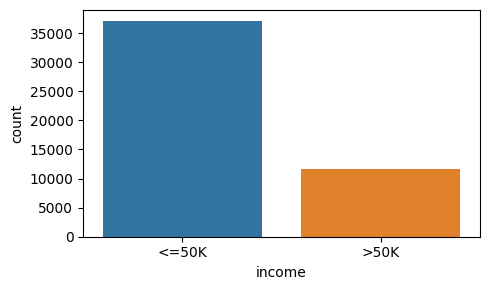

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [98]:
plt.figure(figsize=(5,3))
sns.countplot(x='income', data=df)
plt.tight_layout()
plt.show()

df['income'].value_counts()

- The dataset comprises 37,109 instances with income <=50K and 11,681 instances with income >50K.

- A majority falls into the <=50K category, indicating a prevalent lower income distribution.

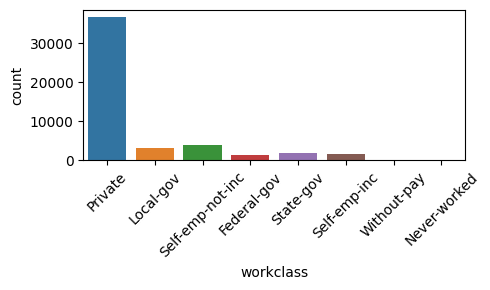

workclass
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [99]:
plt.figure(figsize=(5,3))
sns.countplot(x='workclass', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['workclass'].value_counts()

- The most common workclass is Private with 36,655 instances, followed by Self-emp-not-inc with 3,861 instances.
- Government employment is represented by Local-gov (3,136), State-gov (1,981), and Federal-gov (1,432) categories, highlighting a significant presence in the dataset.
- Categories such as Without-pay (21 instances) and Never-worked (10 instances) have a notably lower representation, suggesting they are less common in the dataset.

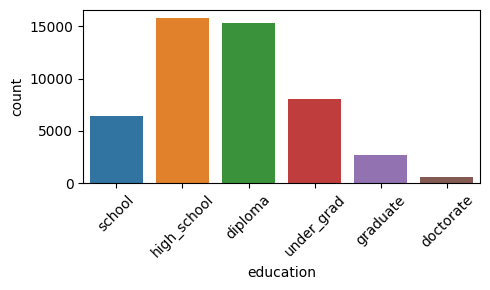

education
high_school    15770
diploma        15358
under_grad      8013
school          6399
graduate        2656
doctorate        594
Name: count, dtype: int64

In [100]:
plt.figure(figsize=(5,3))
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['education'].value_counts()

- High School and Diploma are the most prevalent education levels, with 15,770 and 15,358 instances

- Undergraduate education is represented by 8,013 instances, while School education has 6,399 instances.

- Graduate and Doctorate education levels have comparatively lower representation, with 2,656 and 594 instances

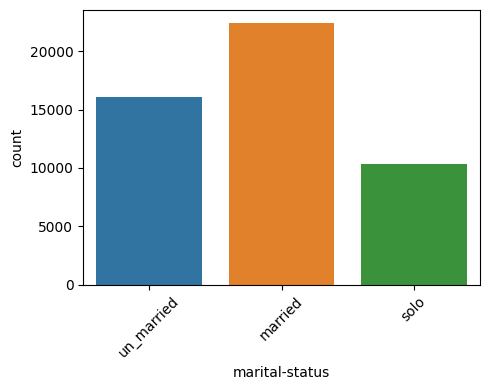

marital-status
married       22403
un_married    16082
solo          10305
Name: count, dtype: int64

In [101]:
plt.figure(figsize=(5,4))
sns.countplot(x='marital-status', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['marital-status'].value_counts()

- Married is the most common marital status, with 22,403 instances, indicating a significant presence in the dataset.

- Unmarried follows with 16,082 instances, and solo has 10,305 instances.

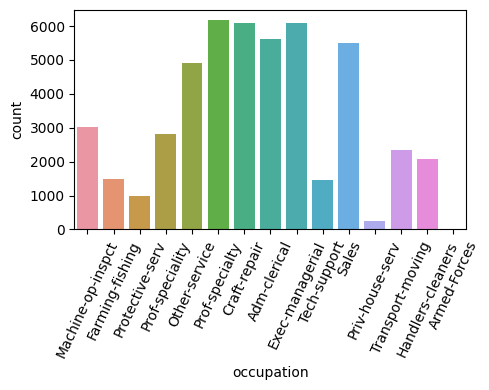

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Prof-speciality      2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [102]:
plt.figure(figsize=(5,4))
sns.countplot(x='occupation', data=df)
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()
df['occupation'].value_counts()

- The dataset encompasses various occupations, with the top three being Prof-specialty (6,165 instances), Craft-repair (6,102 instances), and Exec-managerial (6,082 instances).

- Occupations such as Adm-clerical (5,606 instances), Sales (5,501 instances), and Other-service (4,919 instances) also have notable representation.

- Some occupations have lower instances, including Protective-serv (982 instances), Priv-house-serv (240 instances), and Armed-Forces (15 instances).

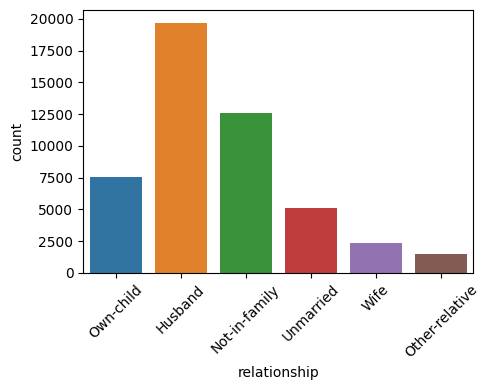

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [103]:
plt.figure(figsize=(5,4))
sns.countplot(x='relationship', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['relationship'].value_counts()

- The dataset includes various relationship categories, with Husband being the most common, represented by 19,703 instances.

- Not-in-family is the second most prevalent relationship category, with 12,557 instances.

- Other categories include Own-child (7,569 instances), Unmarried (5,124 instances), Wife (2,331 instances), and Other-relative (1,506 instances).

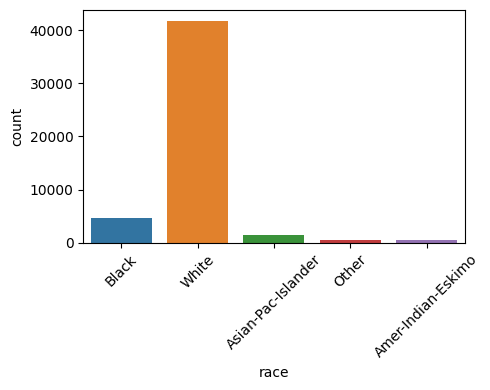

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [104]:
plt.figure(figsize=(5,4))
sns.countplot(x='race', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['race'].value_counts()

- The dataset includes individuals from various racial backgrounds, with White being the most common, represented by 41,714 instances.

- Black is the second most prevalent race, with 4,683 instances.

- Other racial categories include Asian-Pac-Islander (1,517 instances), Amer-Indian-Eskimo (470 instances), and Other (406 instances).

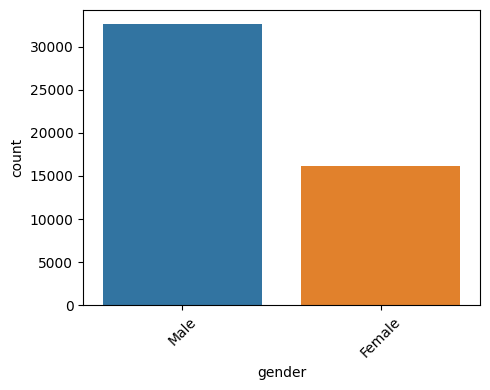

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [105]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['gender'].value_counts()

- The dataset comprises two gender categories: Male with 32,614 instances and Female with 16,176 instances.

- Males are more prevalent in the dataset, outnumbering females.

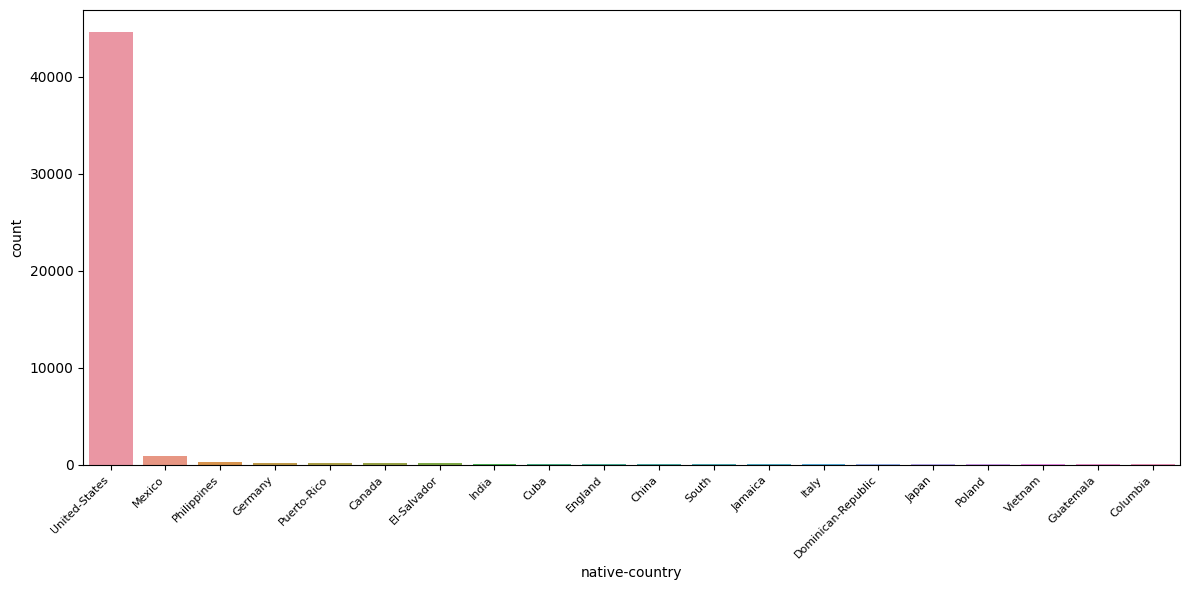

In [106]:
top_20 = df['native-country'].value_counts().head(20)

top_20 = top_20.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='native-country', data=df, order=top_20.index)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust rotation, alignment, and font size
plt.tight_layout()
plt.show()

- The majority of individuals in the dataset are from the United States, with 44,648 instances.

- Other countries with notable representation include Mexico (943 instances), Philippines (294 instances), Germany (206 instances), and Puerto Rico (184 instances).

- Several countries have lower representation, with Holland-Netherlands having the least representation with only 1 instance.

### Bivariate Analysis

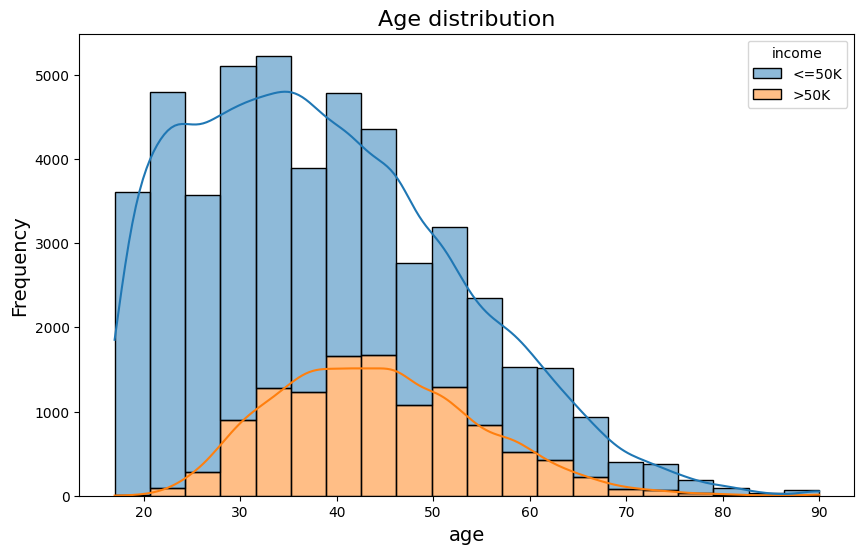

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age',hue='income', bins=20, kde=True, color='skyblue',multiple='stack',data=df)
plt.title('Age distribution', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

- The majority of individuals seem to be in the 30 to 50 age range.
- The income distribution appears to be higher for individuals with higher ages.
- There’s a noticeable difference in income levels between different age groups.

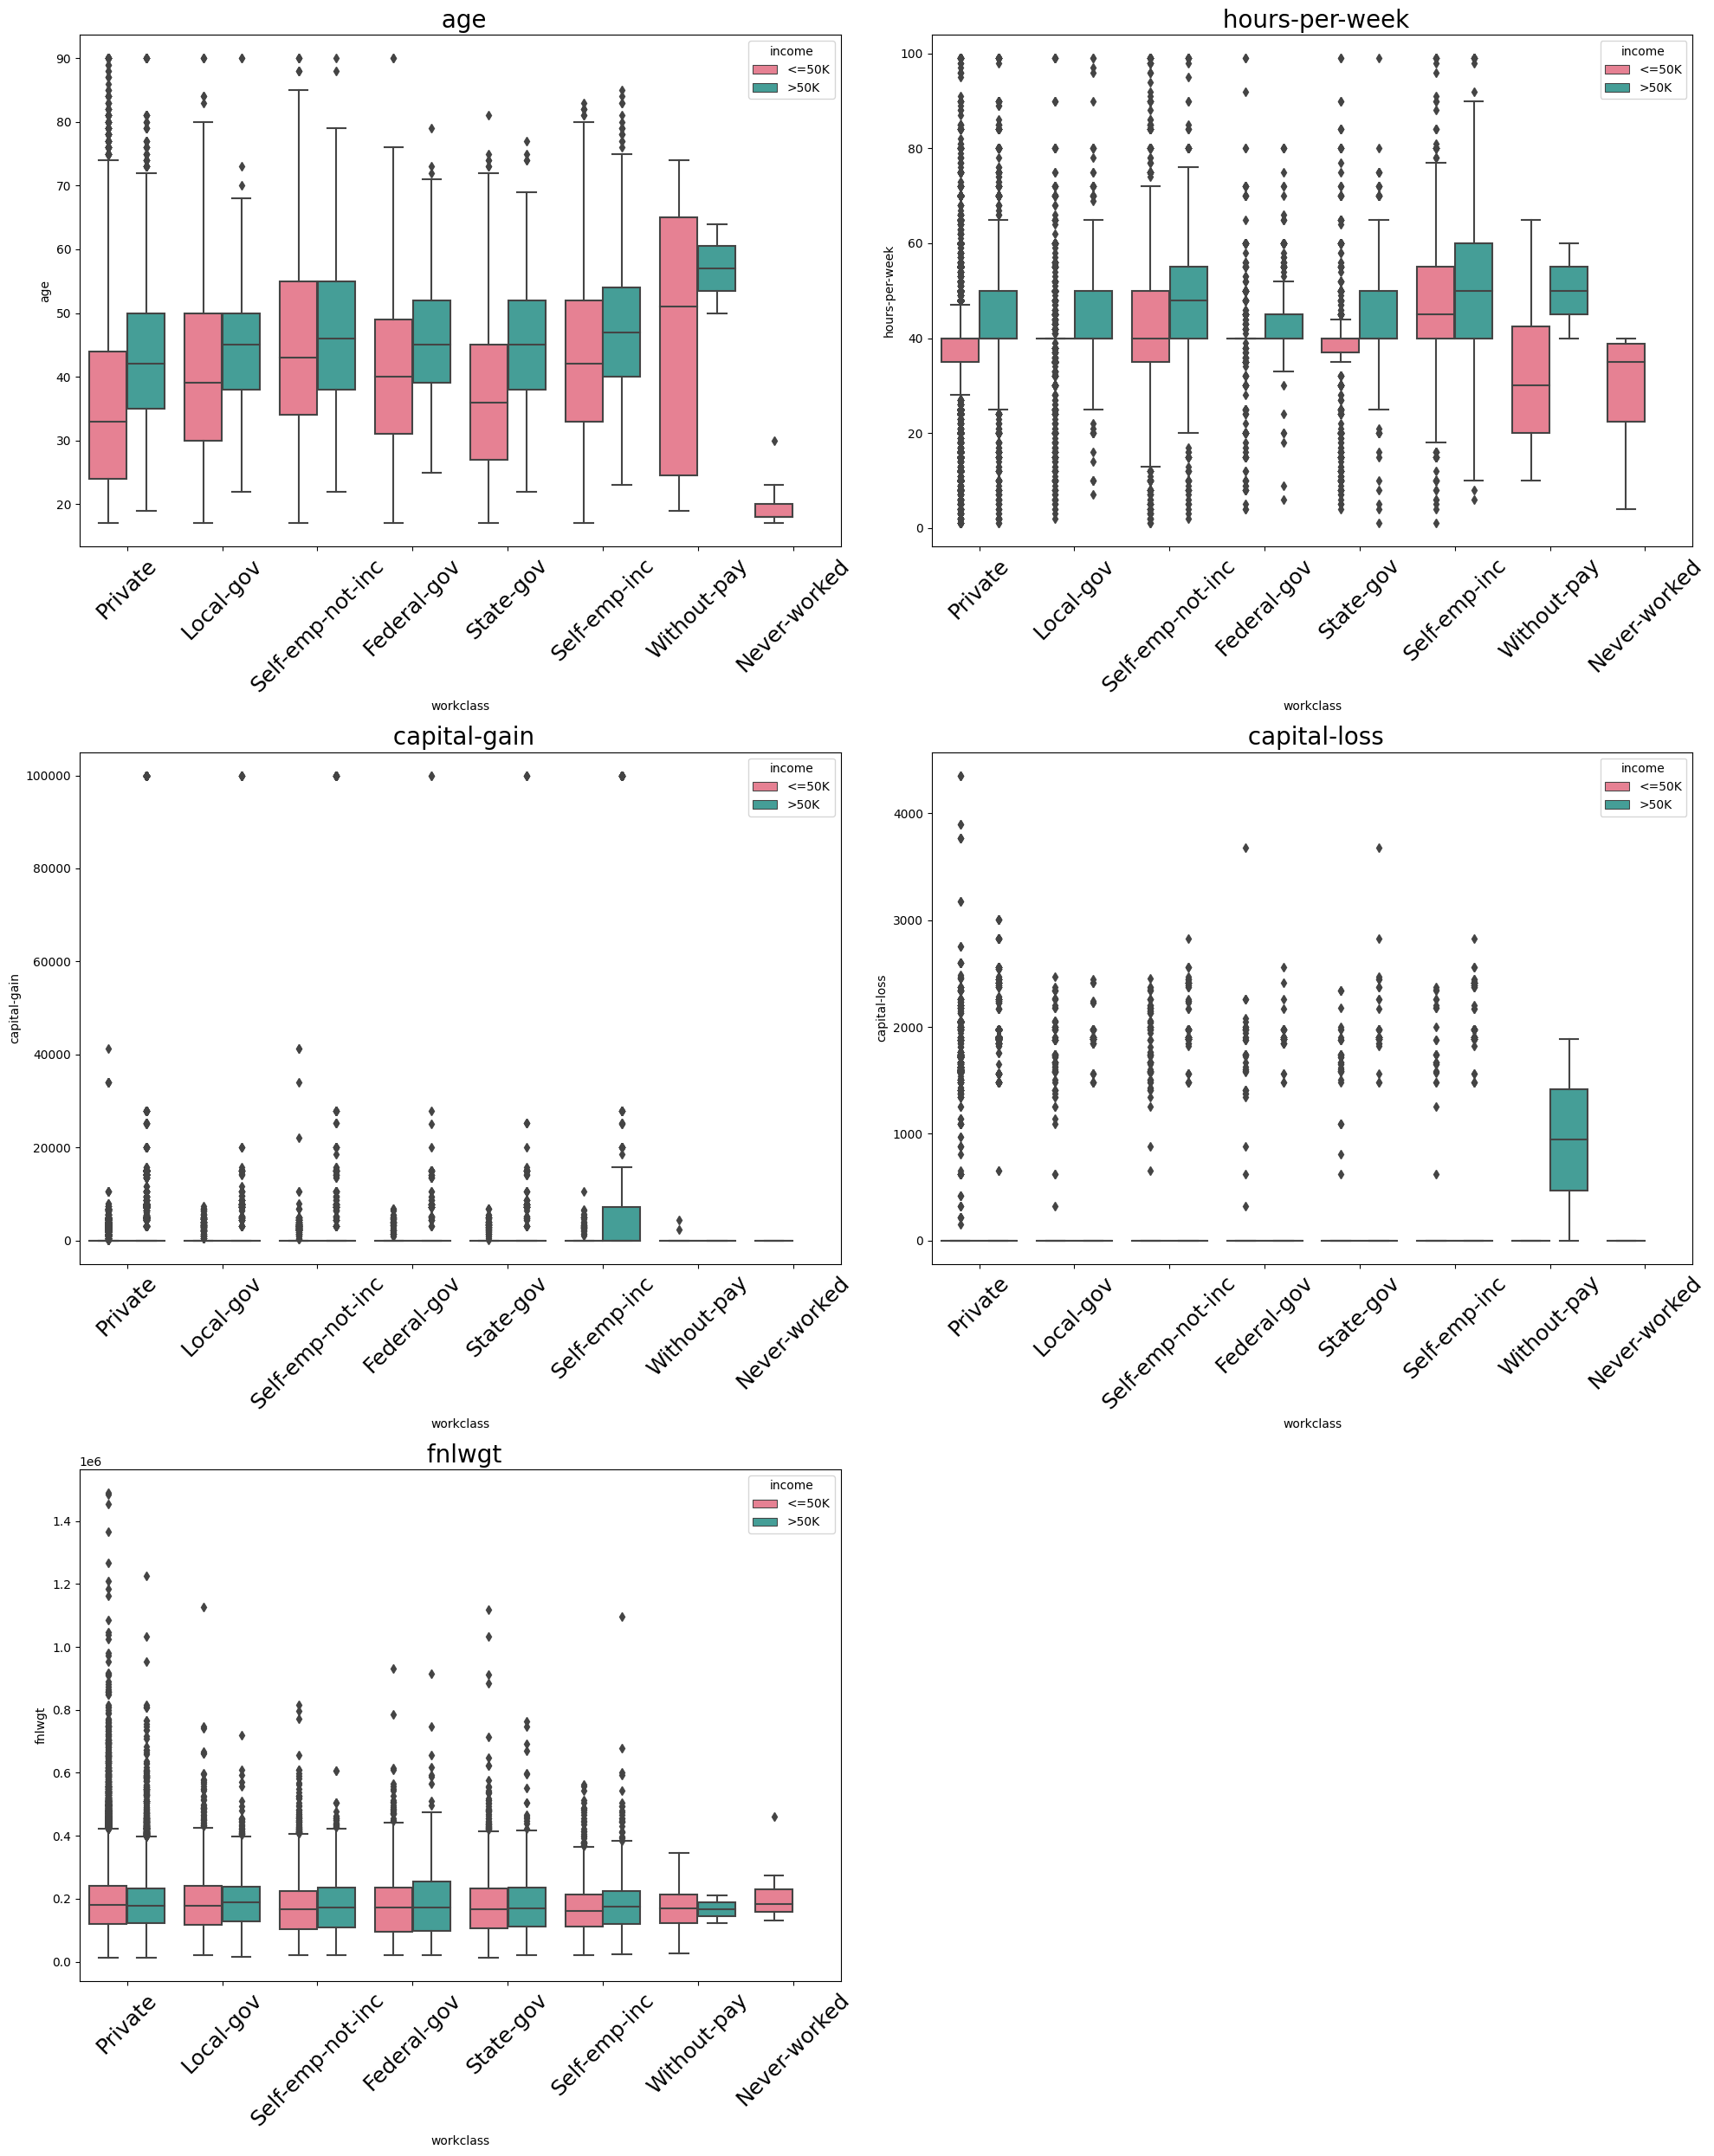

In [108]:
numerical_columns = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(20, 25))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,2 , i)
    sns.boxplot(x='workclass', y=column, hue='income', data=df, palette='husl')
    plt.xticks(rotation = 45, fontsize=18)
    plt.title(f' {column}',fontsize=20)


plt.tight_layout()
plt.show()


**Age:**
- The box plot show the distribution of ages across different work classes.
- Individuals in the Private workclass seem to have a wider age range, with some older individuals.
- Self-employed individuals also exhibit a broader age distribution.
- The median age appears to be higher for those with higher income.

**Hours-per-week:**
- The box plot reveal the variation in weekly working hours.
- Self-employed individuals tend to work longer hours.
- The median hours-per-week is higher for those with higher income.

**Capital Gain:**
- The box plot illustrate the distribution of capital gains.
- Self-employed individuals have higher capital gains.
- Those with higher income tend to have more significant capital gains.

**Capital Loss:**
- The box plot show the distribution of capital losses.
- Self-employed individuals also experience higher capital losses.
- The median capital loss is lower for those with higher income.

**Fnlwgt:**
- The box plots represent the distribution of final weights (a feature related to sampling weights).
- No significant patterns emerge based on work class or income.

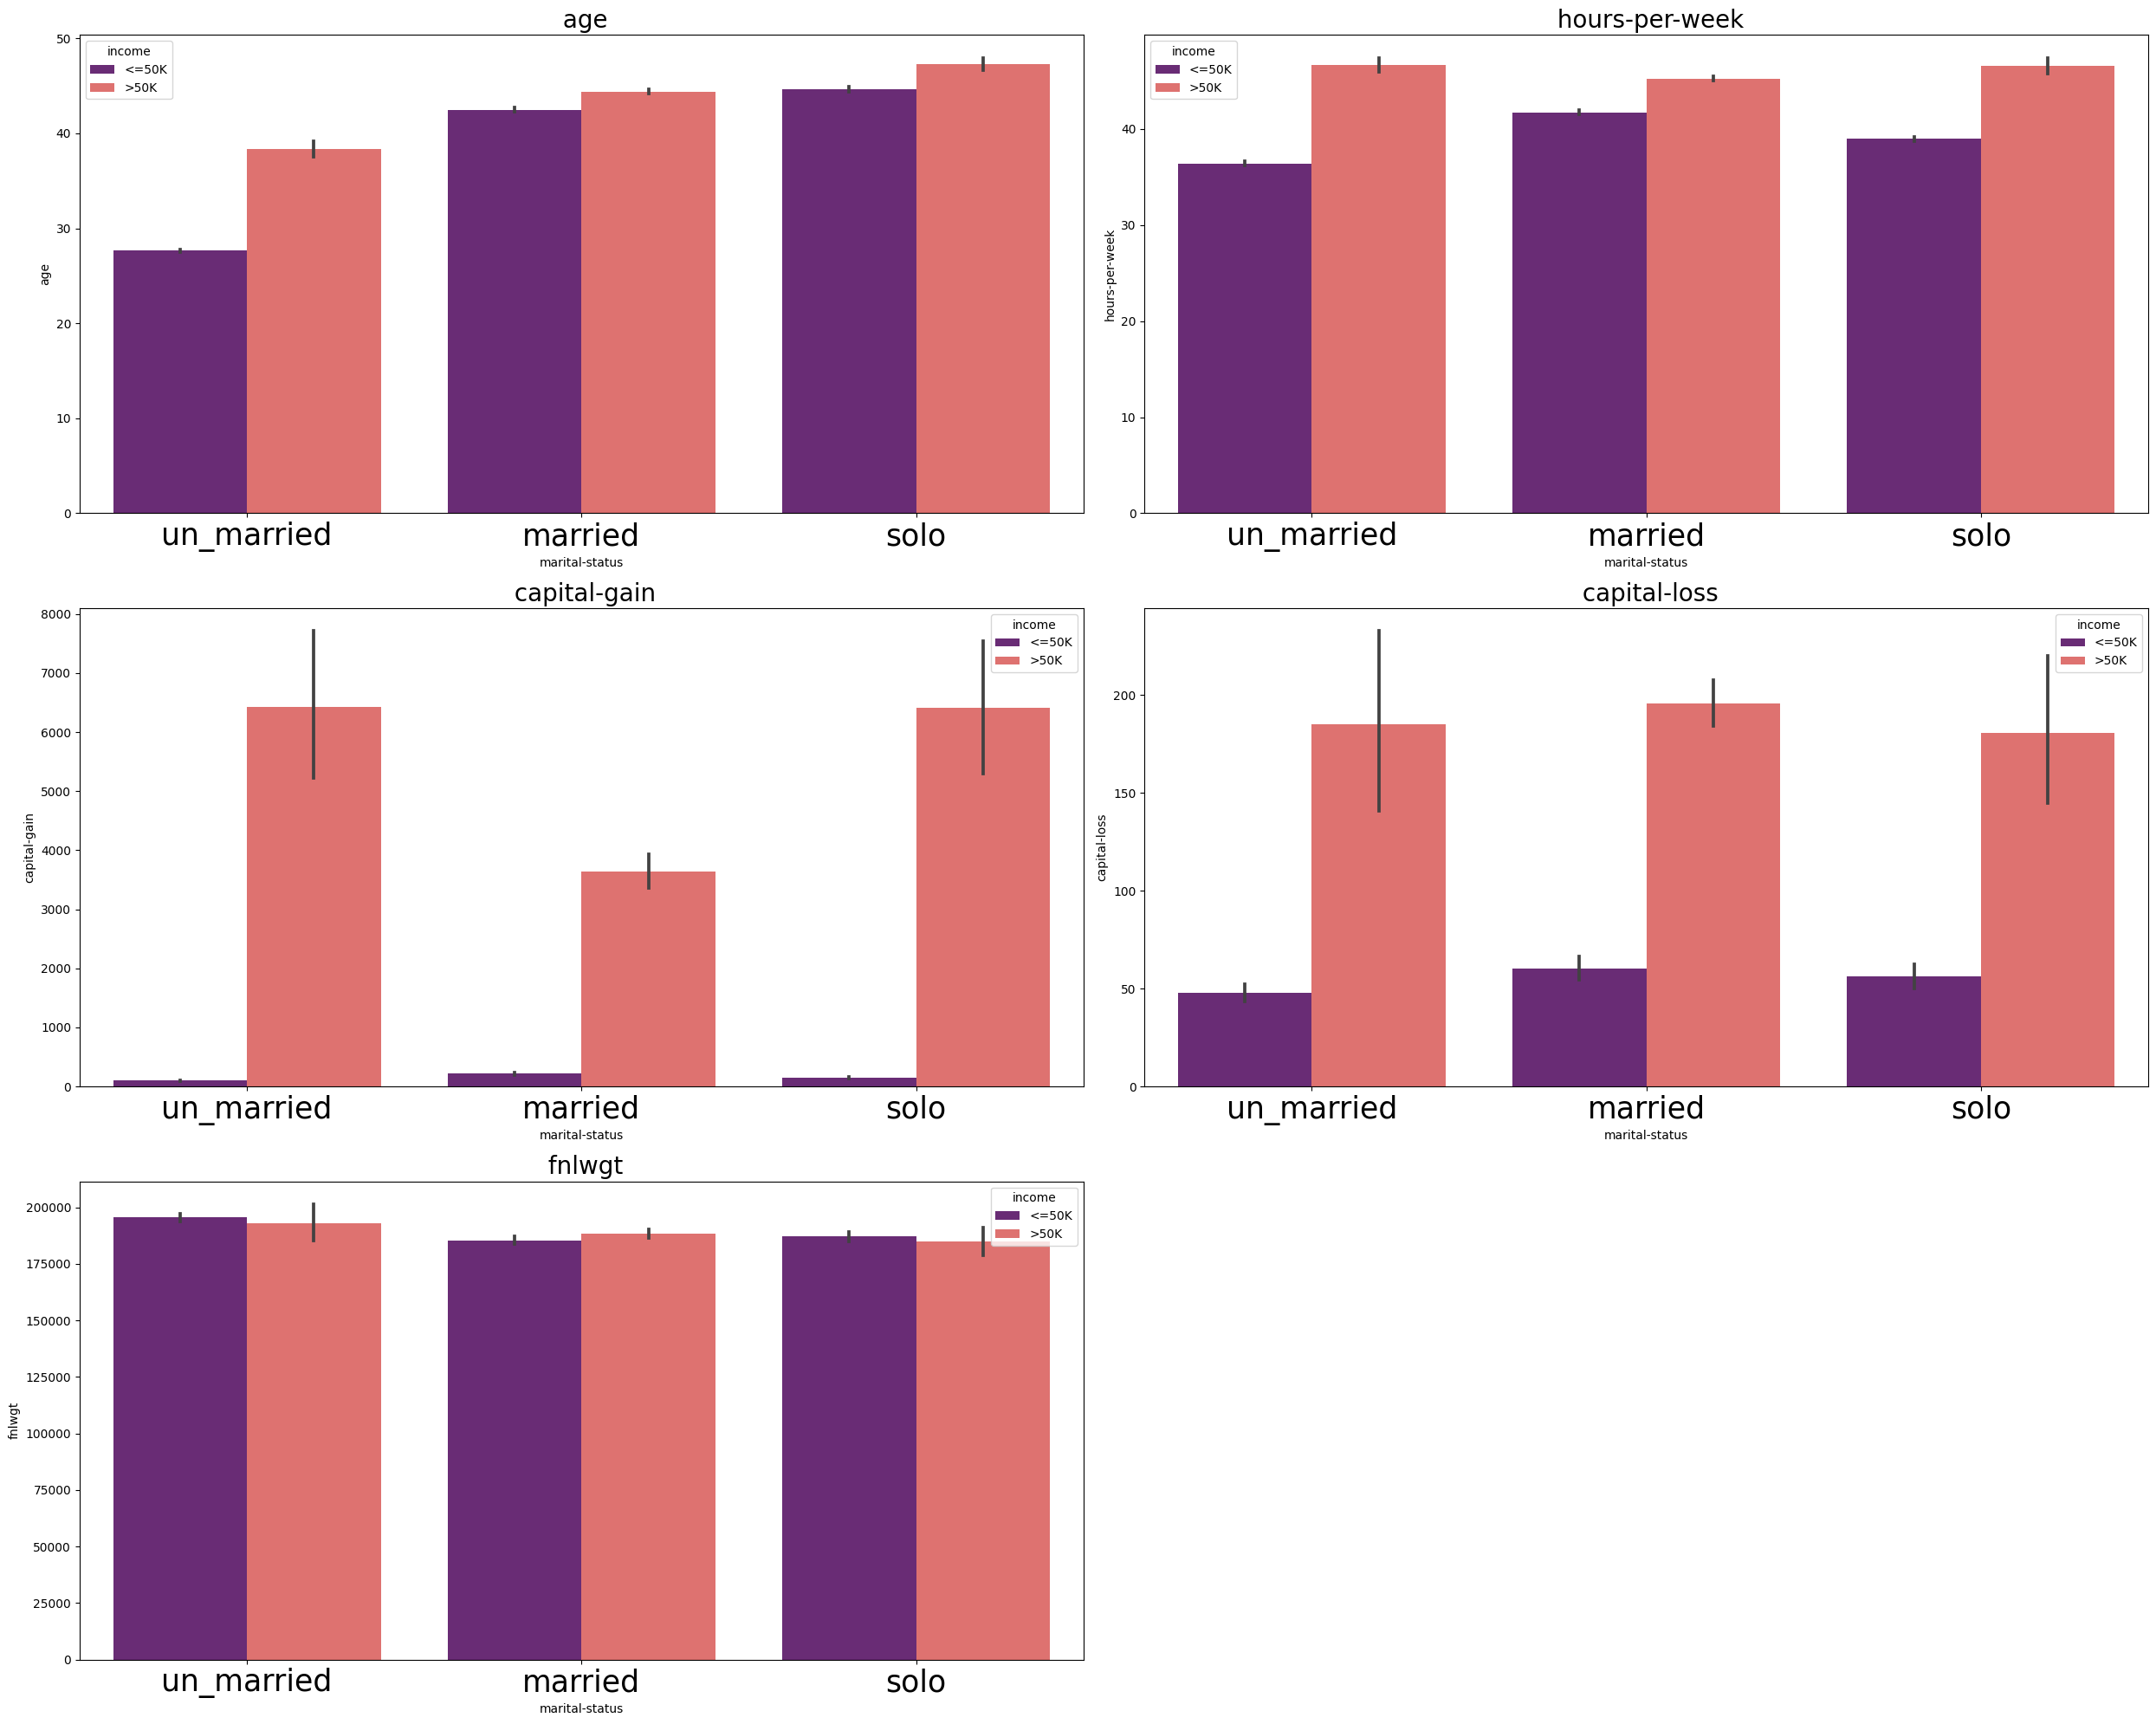

In [109]:
numerical_columns = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(25, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,2 , i)
    sns.barplot(x='marital-status', y=column, hue='income', data=df, palette='magma')
    plt.xticks(fontsize=25)
    plt.title(f' {column}',fontsize=20)

plt.tight_layout()
plt.show()


**Age:**
- The bar plot shows the distribution of ages across different marital statuses.
- Individuals who are married tend to have a wider age range, including older individuals with higher income
- Un-married individuals have a narrower age distribution.
- Solo individuals have higher age distribution among other individuals with high income comparatively


**Hours-per-week:**
- The bar plot reveals the variation in weekly working hours across marital statuses.
- Clear distinct pattern is not seen

**Capital Gain:**
- The bar plot illustrates the distribution of capital gains.
- Un-married and Solo individuals have higher capital gains than married individuals

**Capital Loss:**
- The bar plot shows the distribution of capital losses.
- Married,Un-married,Solo individuals also experience higher capital losses.
- The median capital loss is lower for those with lower income.

 **Fnlwgt:**
- The bar plot represents the distribution of final weights (a feature related to sampling weights).
- No significant patterns emerge based on marital status or income.

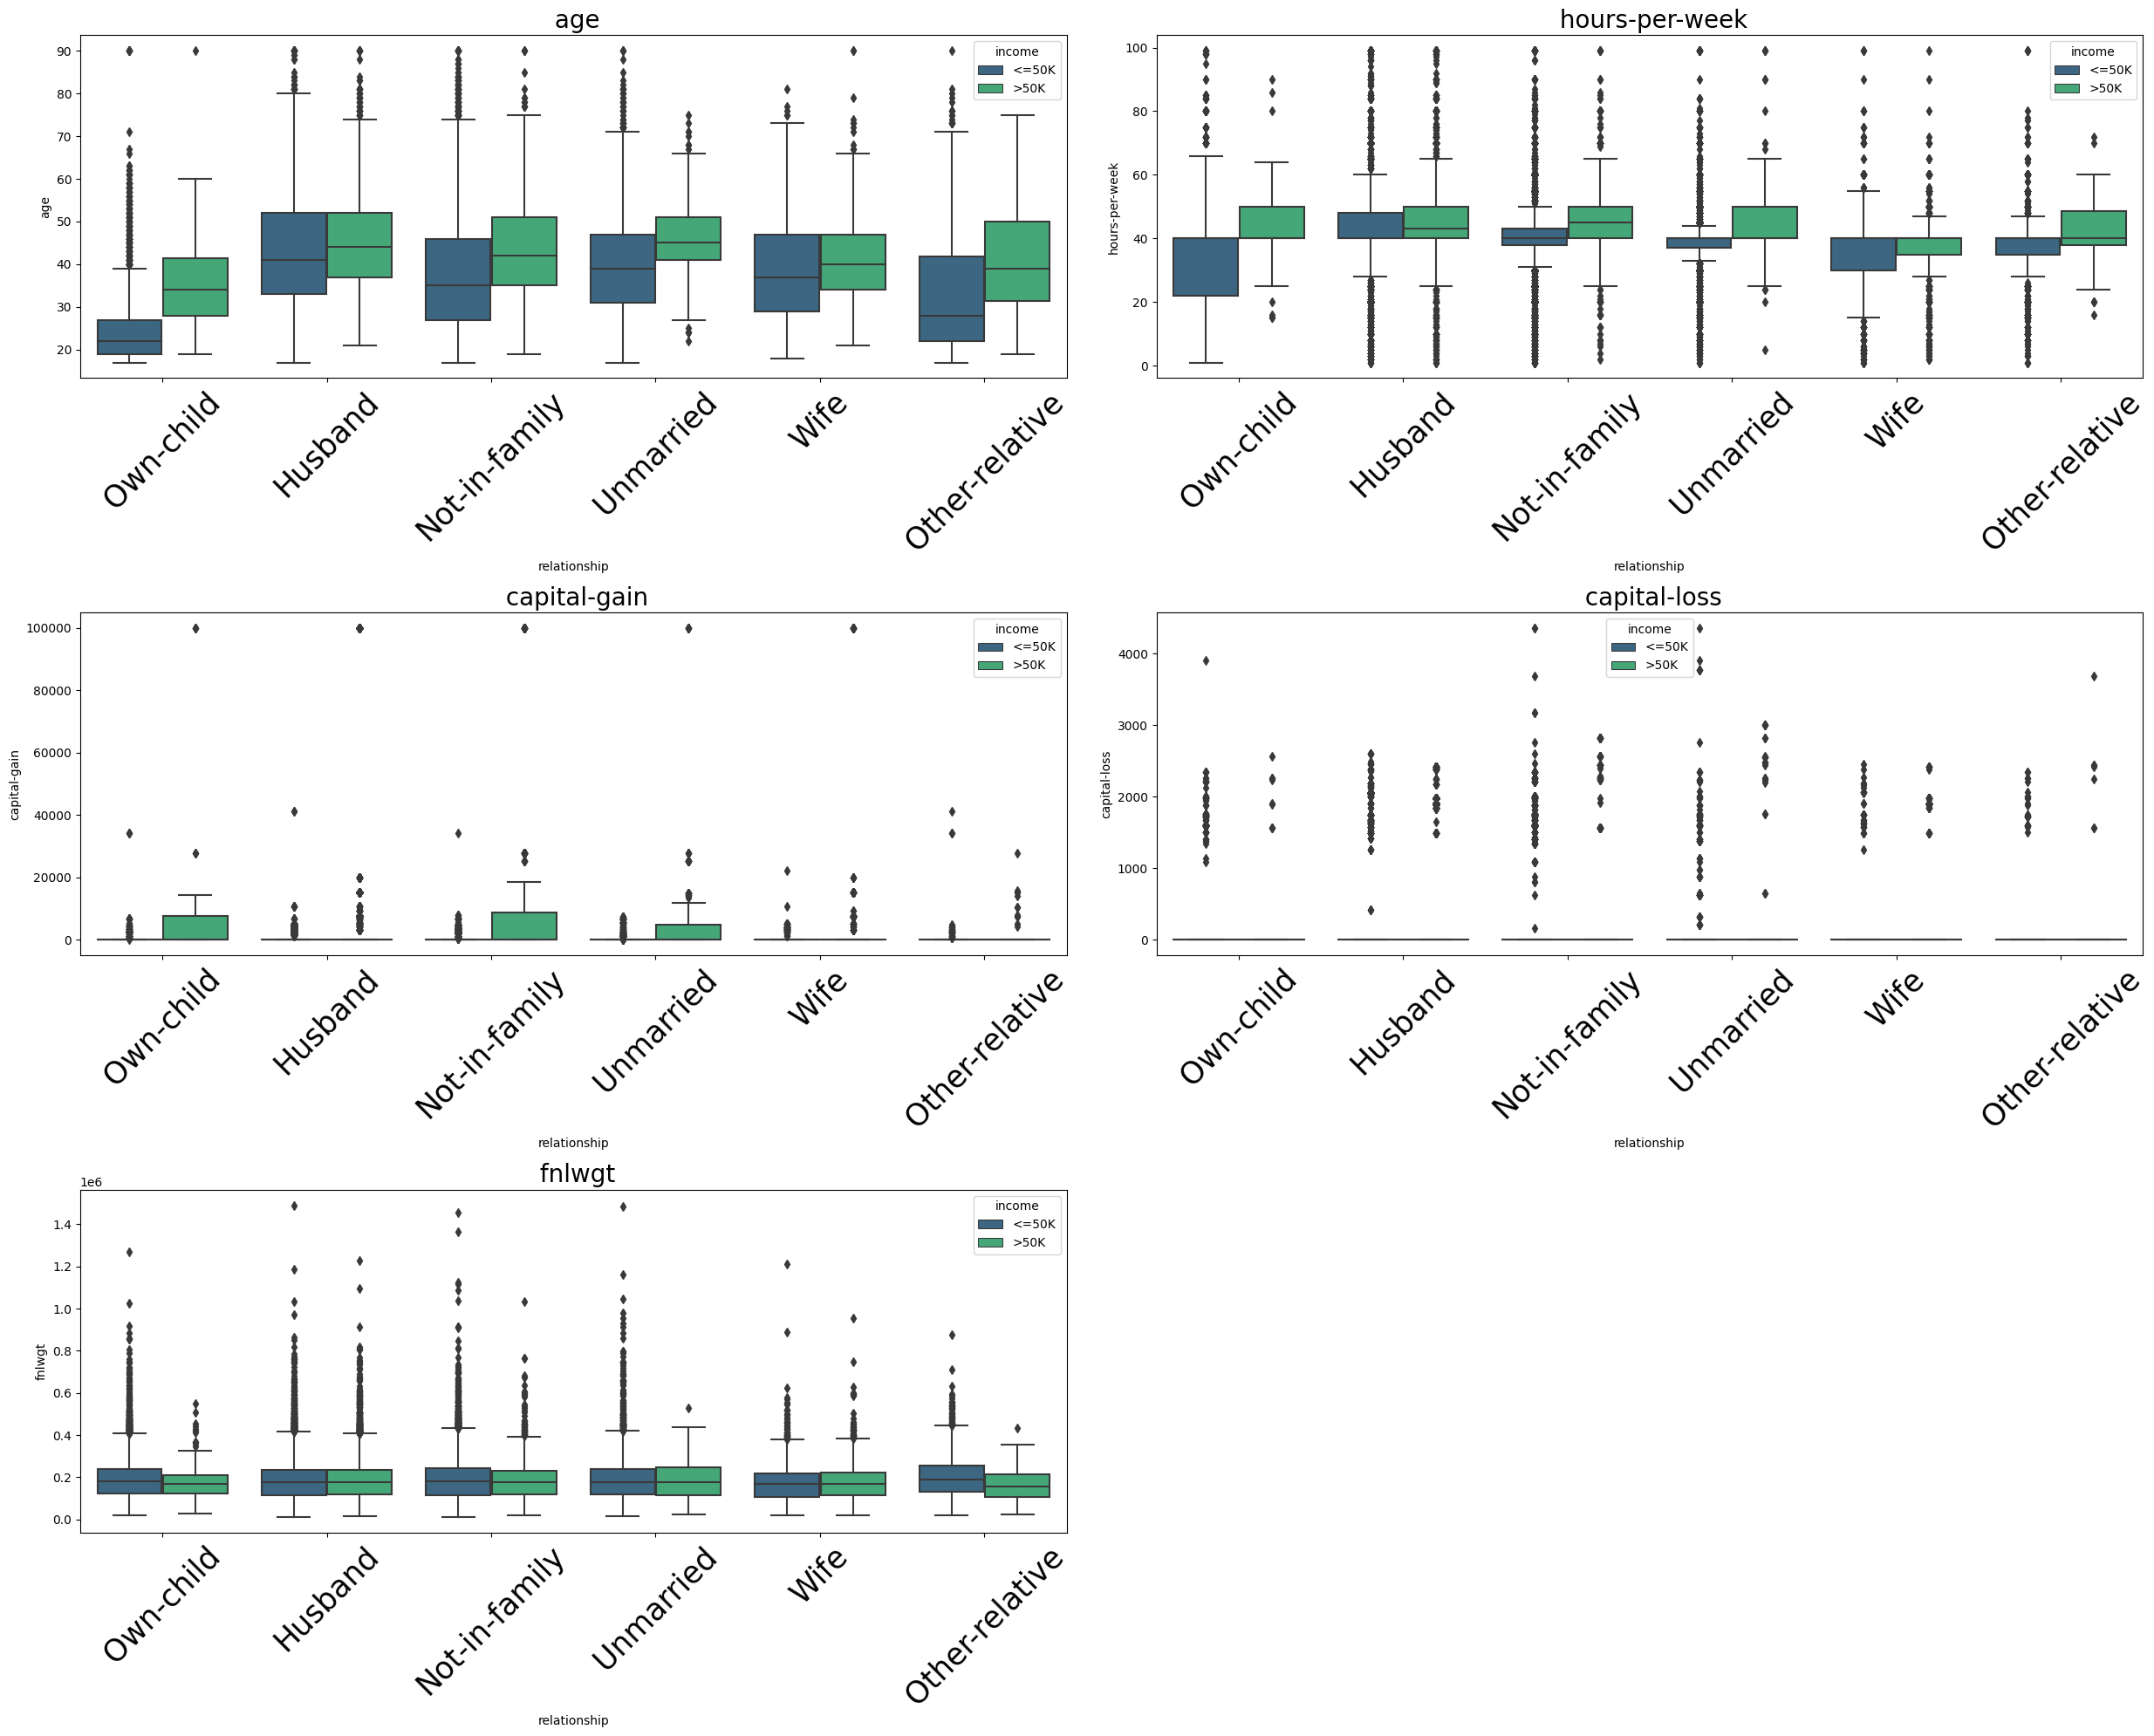

In [110]:
numerical_columns = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(25, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,2 , i)
    sns.boxplot(x='relationship', y=column, hue='income', data=df, palette='viridis')
    plt.xticks(rotation= 45, fontsize=25)
    plt.title(f' {column}',fontsize=20)

plt.tight_layout()
plt.show()

- Age:The box plots show the distribution of ages within different relationship categories. For most relationships, the median age is around 40 to 50 years. The Husband and Wife categories have slightly higher median ages. Outliers (represented as dots) exist in various relationships.
- Hours per Week:The box plots reveal the distribution of work hours (hours-per-week) for different relationships. Most individuals work around 40 hours per week. Husbands tend to work slightly longer hours compared to other relationships.
- Capital Gain:The distribution of capital gains varies across relationships. Husbands and Wives have higher median capital gains. Other relationships show a mix of capital gains.
- Capital Loss:Capital losses are generally low across all relationships. Husbands and Wives have slightly higher median capital losses.
- Fnlwgt (Final Weight):The distribution of final weights (fnlwgt) is similar across relationships. No significant differences in median values are observed.

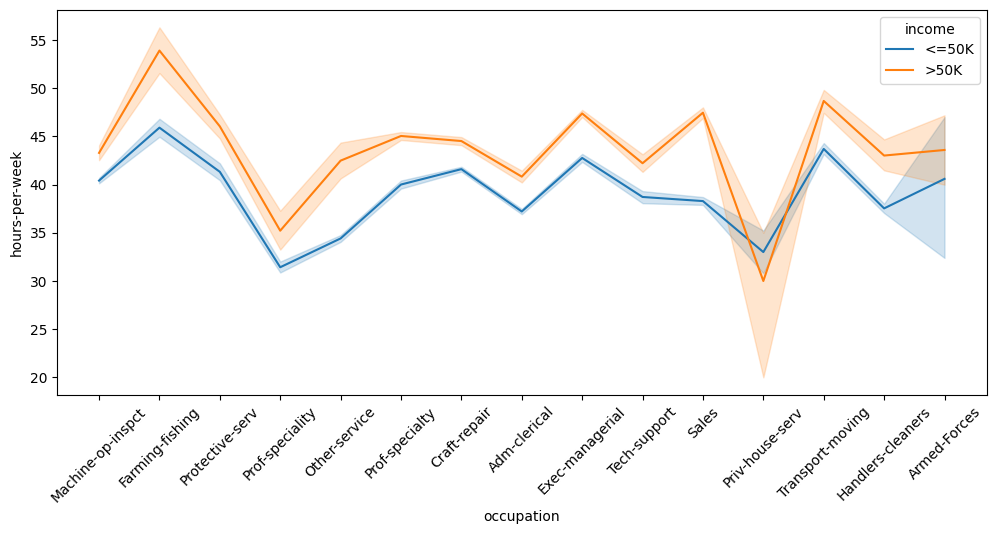

hours-per-week: income  occupation       
<=50K   Adm-clerical         37.215792
        Armed-Forces         40.600000
        Craft-repair         41.612076
        Exec-managerial      42.773300
        Farming-fishing      45.917683
        Handlers-cleaners    37.537506
        Machine-op-inspct    40.424036
        Other-service        34.419088
        Priv-house-serv      33.004219
        Prof-speciality      31.428346
        Prof-specialty       40.013893
        Protective-serv      41.332344
        Sales                38.296076
        Tech-support         38.722927
        Transport-moving     43.710245
>50K    Adm-clerical         40.833333
        Armed-Forces         43.600000
        Craft-repair         44.528220
        Exec-managerial      47.390571
        Farming-fishing      53.919075
        Handlers-cleaners    43.021739
        Machine-op-inspct    43.296496
        Other-service        42.495098
        Priv-house-serv      30.000000
        Prof-specialit

In [111]:
plt.figure(figsize=(12,5))
sns.lineplot(x='occupation',y='hours-per-week',hue='income', data=df)
plt.xticks(rotation=45)
plt.show()

print('hours-per-week:',df.groupby(['income','occupation'])['hours-per-week'].mean())

- Individuals earning <=50K generally exhibit diverse hours-per-week patterns across occupations, with the lowest average for Priv-house-serv (33.00 hours) and the highest for Farming-fishing (45.92 hours).

- For those earning >50K, Exec-managerial roles have the highest average hours-per-week (47.39), contrasting with lower values for Priv-house-serv (30.00 hours) and Prof-speciality (35.22 hours).

- Protective-serv and Transport-moving occupations show increased average hours-per-week for both income groups, potentially reflecting the nature of these roles.

- Discrepancies in hours-per-week between Prof-speciality and Prof-specialty for <=50K suggest a data discrepancy that may require investigation for accuracy in analysis.

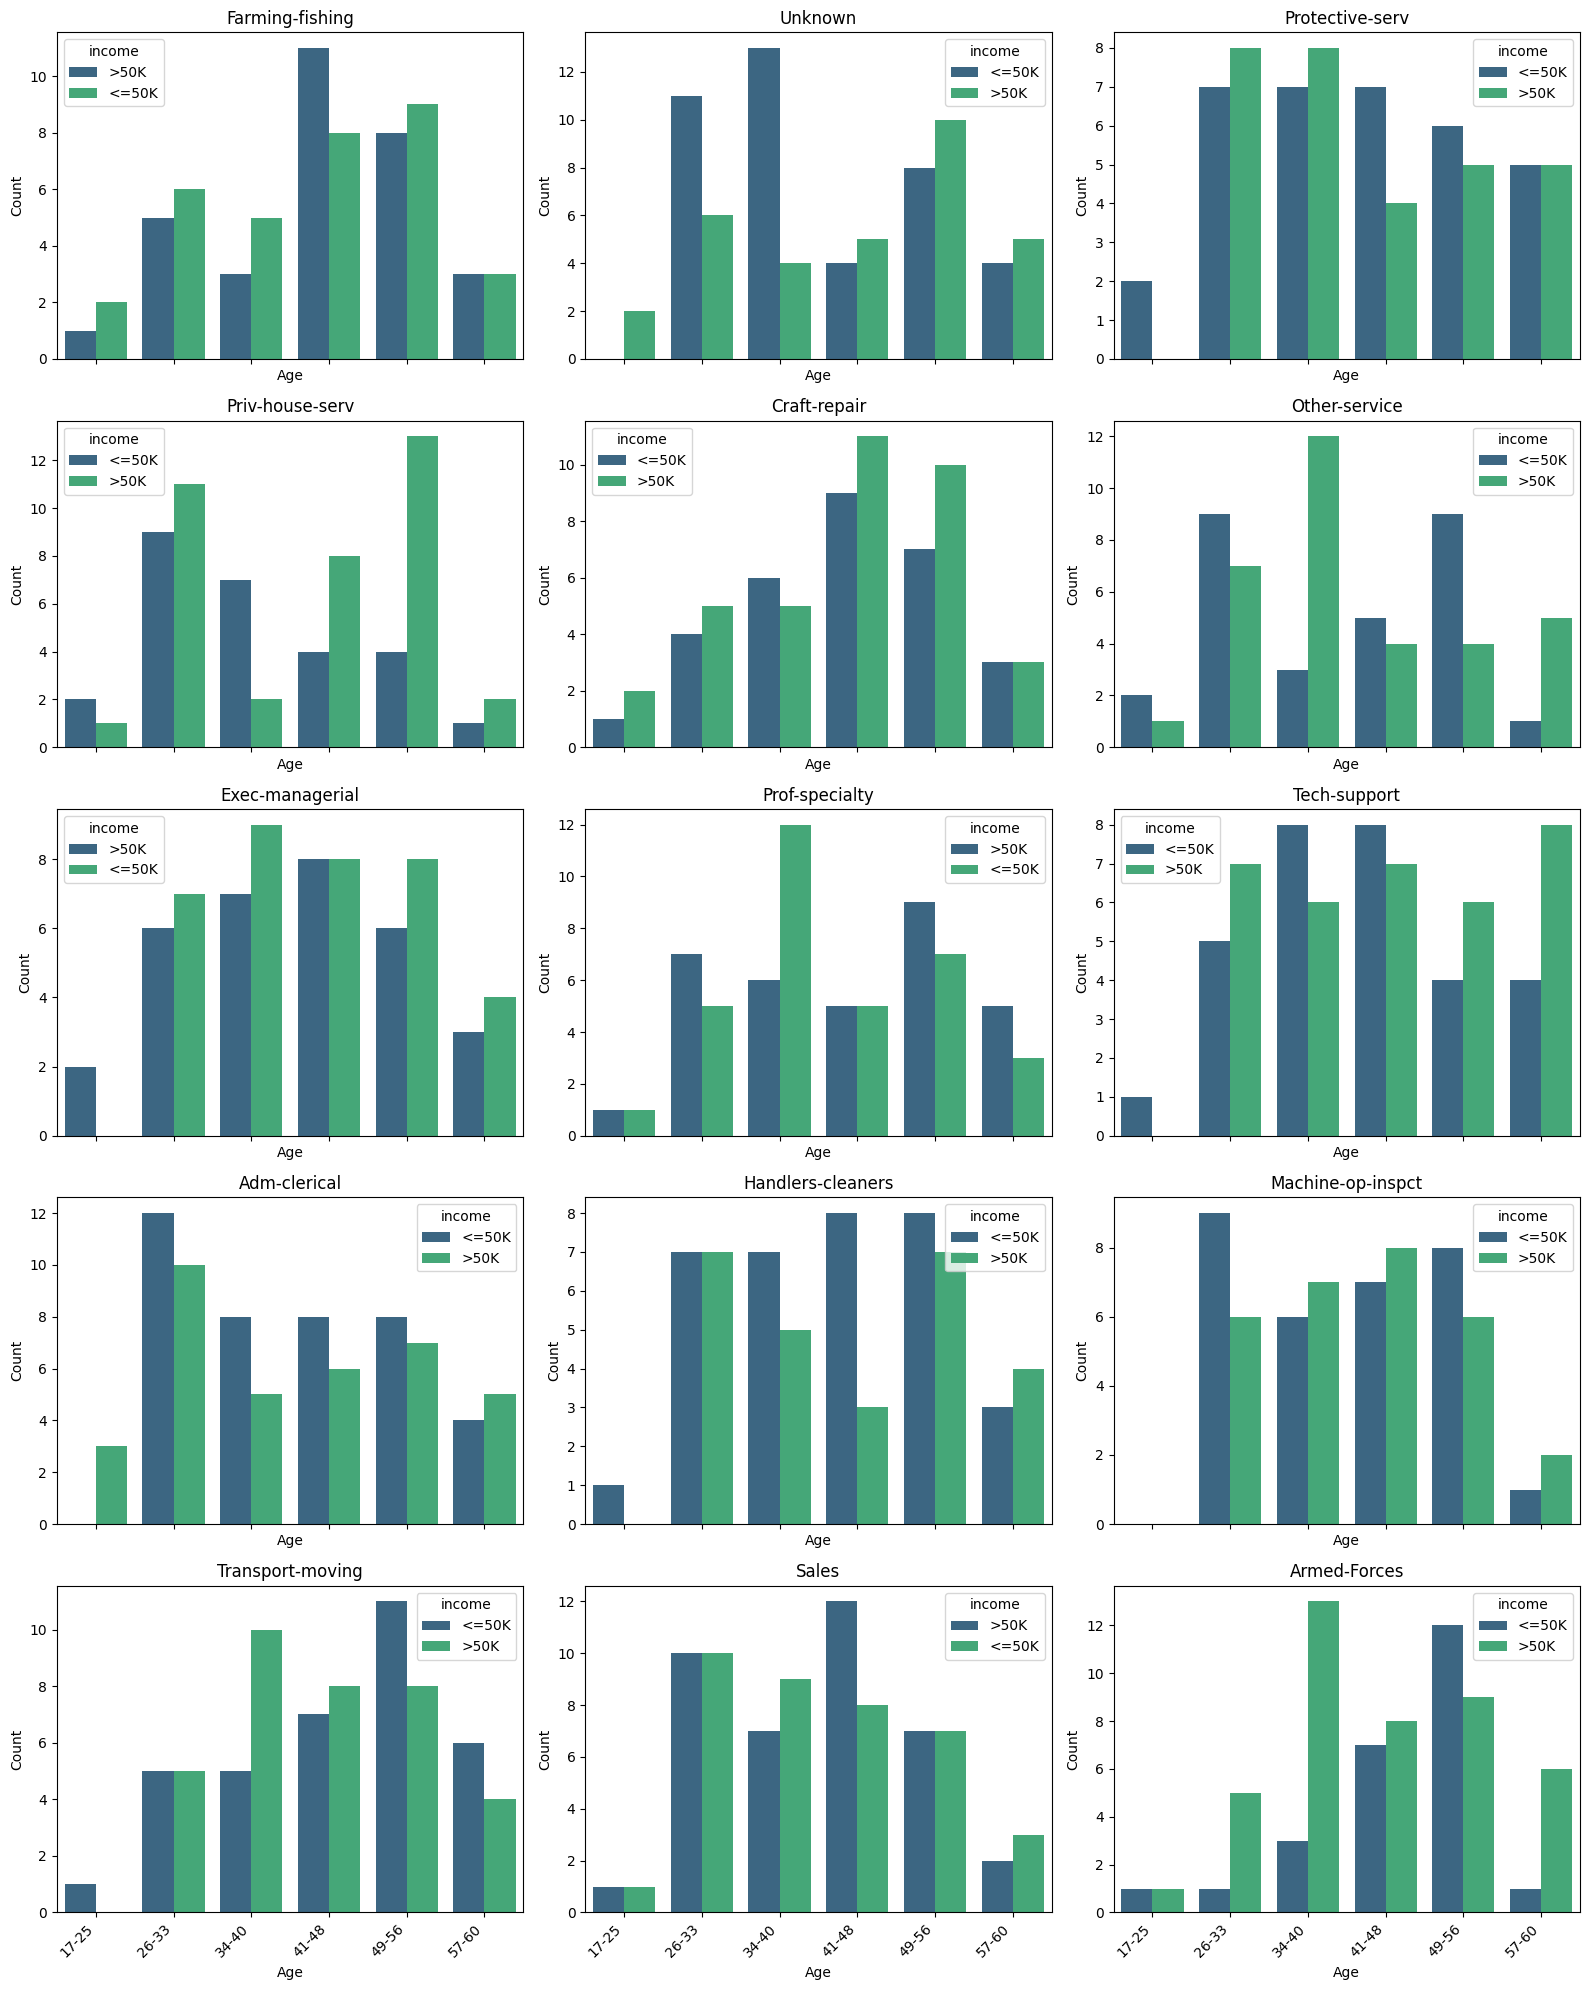

In [112]:
df = pd.DataFrame({
    'income': np.random.choice(['<=50K', '>50K'], size=1000),
    'age': np.random.randint(25, 60, 1000),
    'occupation': np.random.choice(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales',
                                    'Other-service', 'Machine-op-inspct', 'Unknown', 'Transport-moving',
                                    'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv',
                                    'Priv-house-serv', 'Armed-Forces'], size=1000),
})

# Create age bins
age_bins = [17, 25, 33, 40, 48, 56, 60]
labels = ['17-25', '26-33', '34-40', '41-48', '49-56', '57-60']

# Create a new DataFrame with age bins
df['age'] = pd.cut(df['age'], age_bins, labels=labels)

# Create subplots
fig, axs = plt.subplots((len(df['occupation'].unique()) + 2) // 3, 3, figsize=(16, 20), sharex=True)

# Plot the distribution of income by age bin for each job role
unique_job_roles = df['occupation'].unique()

for i, job_role in enumerate(unique_job_roles):
    ax = axs[i // 3, i % 3] if len(unique_job_roles) > 1 else axs
    df_filtered = df[df['occupation'] == job_role]
    sns.countplot(x='age', hue='income', data=df_filtered, order=labels, palette='viridis', ax=ax)
    ax.set_title(job_role)
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # Rotate x-axis tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

Income Distribution by Age and Occupation at different job roles.
- Occupations with higher income potential at younger ages: Slaes, Transport-moving, Protective-Services,Other-Services,Machine-op-Services, Hnadlers-cleaners
- Occupations where income tends to increase with age: Craft-repair,Exec-managerial



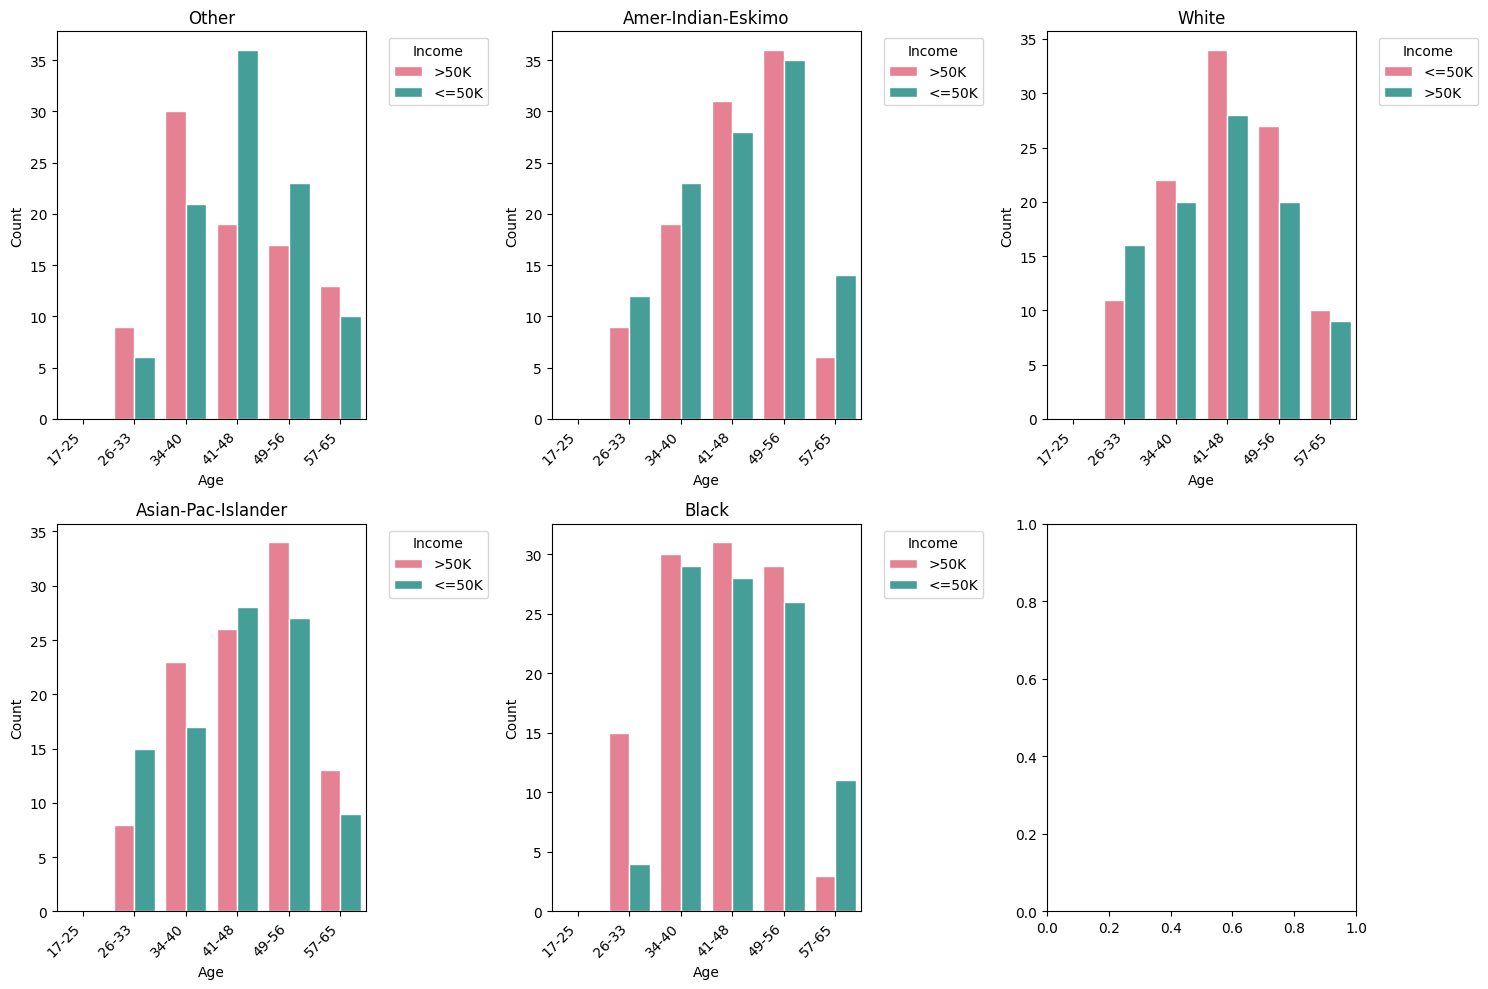

In [113]:
df = pd.DataFrame({
    'income': np.random.choice(['<=50K', '>50K'], size=1000),
    'age': np.random.randint(30, 60, 1000),
    'race': np.random.choice(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], size=1000),
})

# Create age bins
age_bins = [17, 25, 33, 40, 48, 56, 65]
labels = ['17-25', '26-33', '34-40', '41-48', '49-56', '57-65']

# Create a new DataFrame with age bins
df['AgeBin'] = pd.cut(df['age'], age_bins, labels=labels)

# Create subplots grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the distribution of income by age bin for each race
unique_races = df['race'].unique()

# Iterate over races and plot countplot
for i, race in enumerate(unique_races):
    ax = axs[i // 3, i % 3]
    df_filtered = df[df['race'] == race]
    sns.countplot(x='AgeBin', hue='income', data=df_filtered, palette='husl', edgecolor='white', ax=ax)
    ax.set_title(race)
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # Rotate x-axis tick labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add legend outside the plot
    ax.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

- Black:The plot shows that individuals in the 34-40 and 49-56 age groups tend to have higher incomes (greater proportion in the >50K category). Overall, the distribution is relatively balanced across age bins.
- Asian-Pac_Islander:The 34-56 age groups dominate the >=50K income category. The 17-25 age group has a higher proportion of low-income earners.

- Amer-Indian-Eskimo:  The 41-48 and 49-56 age groups also contribute significantly to the >50K category. The 57-60 age group shows a balanced distribution.
- White: The 26-33 and 34-40 age groups are dominant in the <=50K category. The 41-48 and 49-56 age groups contribute to both income levels. The 57-60 age group has a higher proportion of low-income earners.
- Other: 49-56 age groups contribute to high income levels. 


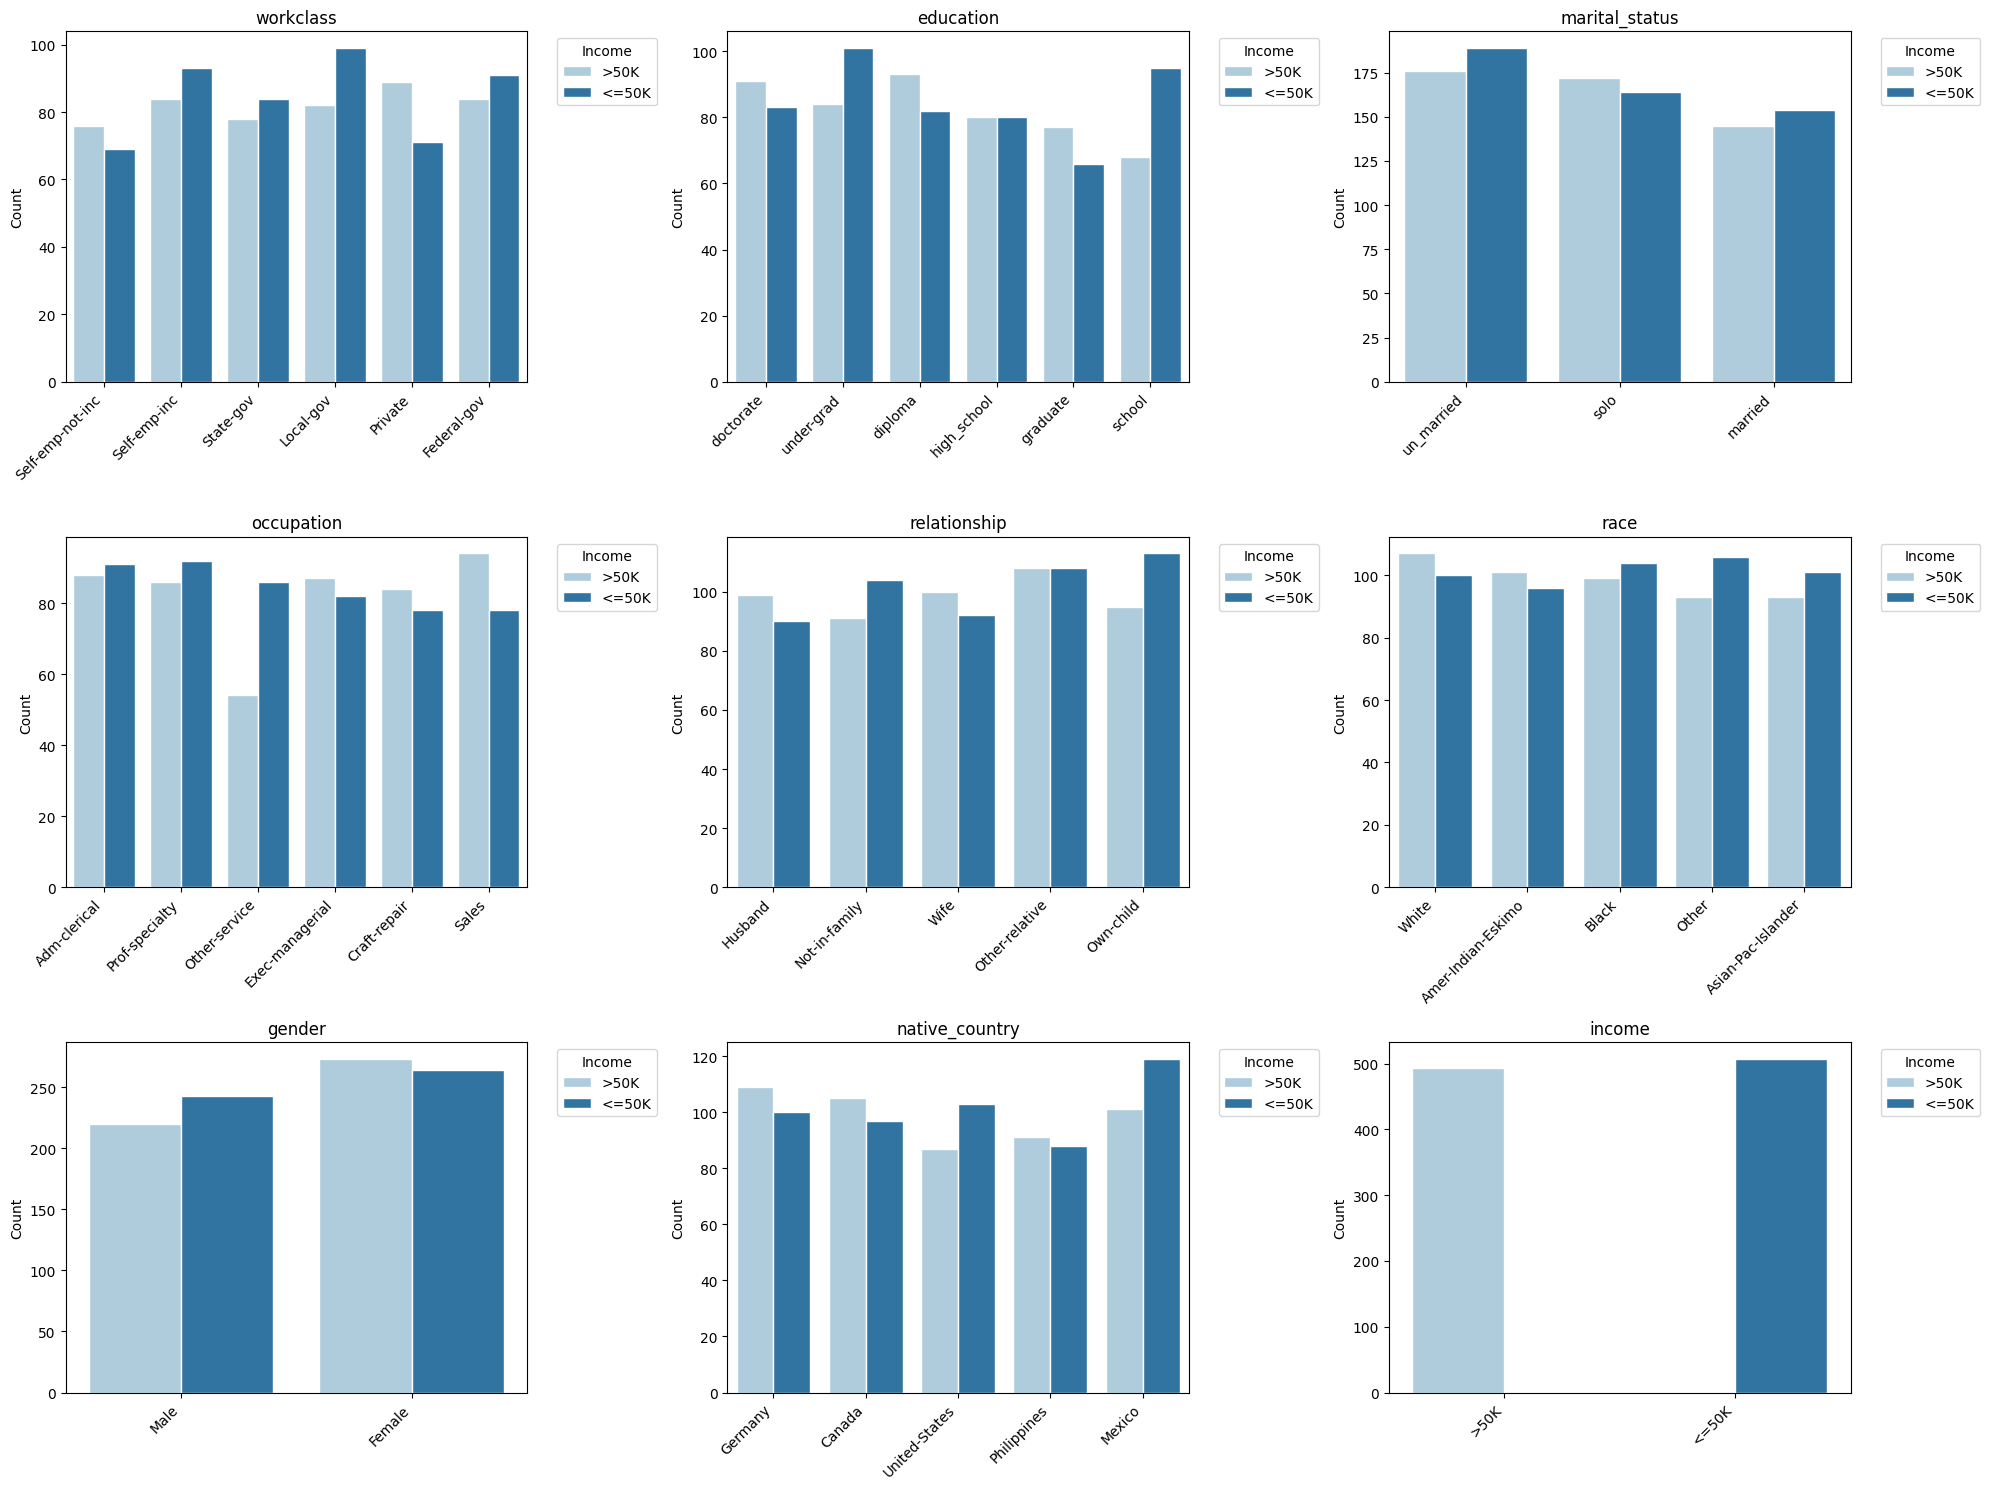

In [114]:
df = pd.DataFrame({
    'workclass': np.random.choice(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov'], size=1000),
    'education': np.random.choice(['school','high_school','diploma','under-grad', 'graduate','doctorate'], size=1000),
    'marital_status': np.random.choice(['married', 'un_married','solo'], size=1000),
    'occupation': np.random.choice(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service'], size=1000),
    'relationship': np.random.choice(['Husband', 'Wife', 'Own-child', 'Not-in-family', 'Other-relative'], size=1000),
    'race': np.random.choice(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], size=1000),
    'gender': np.random.choice(['Male', 'Female'], size=1000),
    'native_country': np.random.choice(['United-States', 'Mexico', 'Philippines', 'Canada', 'Germany'], size=1000),
    'income': np.random.choice(['<=50K', '>50K'], size=1000),
    'age': np.random.randint(30, 60, 1000),
    'fnlwgt': np.random.randint(10000, 90000, 1000),
    'capital_gain': np.random.randint(0, 10000, 1000),
    'capital_loss': np.random.randint(0, 5000, 1000),
    'hours_per_week': np.random.randint(20, 60, 1000),
})

# Create age bins
age_bins = [17, 25, 33, 40, 48, 56, 65]
labels = ['17-25', '26-33', '34-40', '41-48', '49-56', '57-65']
df['AgeBin'] = pd.cut(df['age'], age_bins, labels=labels)

# Create subplots grid
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Iterate over parameters and plot countplot
parameters = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 
              'gender', 'native_country', 'income']
for i, parameter in enumerate(parameters):
    ax = axs[i // 3, i % 3]
    sns.countplot(x=parameter, hue='income', data=df, palette='Paired', edgecolor='white', ax=ax)
    ax.set_title(parameter)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Rotate x-axis tick labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add legend outside the plot
    ax.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


- Workclass: The first subplot shows the distribution of individuals across different workclasses. The majority of individuals are from the 'Private' workclass, followed by 'Self-emp-not-inc' and 'Local-gov'. The count of individuals earning '>50K' is generally lower in each workclass compared to the count of individuals earning '<=50K'.

- Education: The second subplot displays the distribution of individuals based on their education level. The majority of individuals have 'Highschool education, followed by 'school' and 'diploma'. As the education level increases, the count of individuals earning '>50K' tends to rise.

- Marital_Status: The third subplot shows the distribution of individuals across different marital statuses. The 'Un-married' category has the highest count, followed by 'Solo' and 'Married'.

- Occupation: The fourth subplot displays the distribution of individuals across different occupations. The most common occupations are 'Craft-repair', 'Exec-managerial', and 'Prof-specialty'. Certain occupations, such as 'Adm-Clerical' and 'Prof-specialty', have a higher count in the '>50K' income category.

- Relationship: The fifth subplot represents the distribution of individuals based on their relationship status. The majority of individuals are 'Not-in-family' or 'Own-child'. The count of individuals earning '>50K' is generally higher among 'Not-in-family' categories.

- Race: The sixth subplot shows the distribution of individuals across different races. The majority of individuals are 'Asian-Pac-Islander' and 'White'. The count of individuals earning '>50K' is generally higher among the 'Black' race category.

- Sex: The seventh subplot represents the distribution of individuals based on their gender. The count of males is higher than females in the dataset. The count of individuals earning '>50K' is generally higher among males.

- Native_Country: The eight subplot displays the distribution of individuals across different native countries. The majority of individuals are from  'Mexico' and 'Philippines'. The count of individuals earning '>50K' is generally higher among individuals from the 'Canada'.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


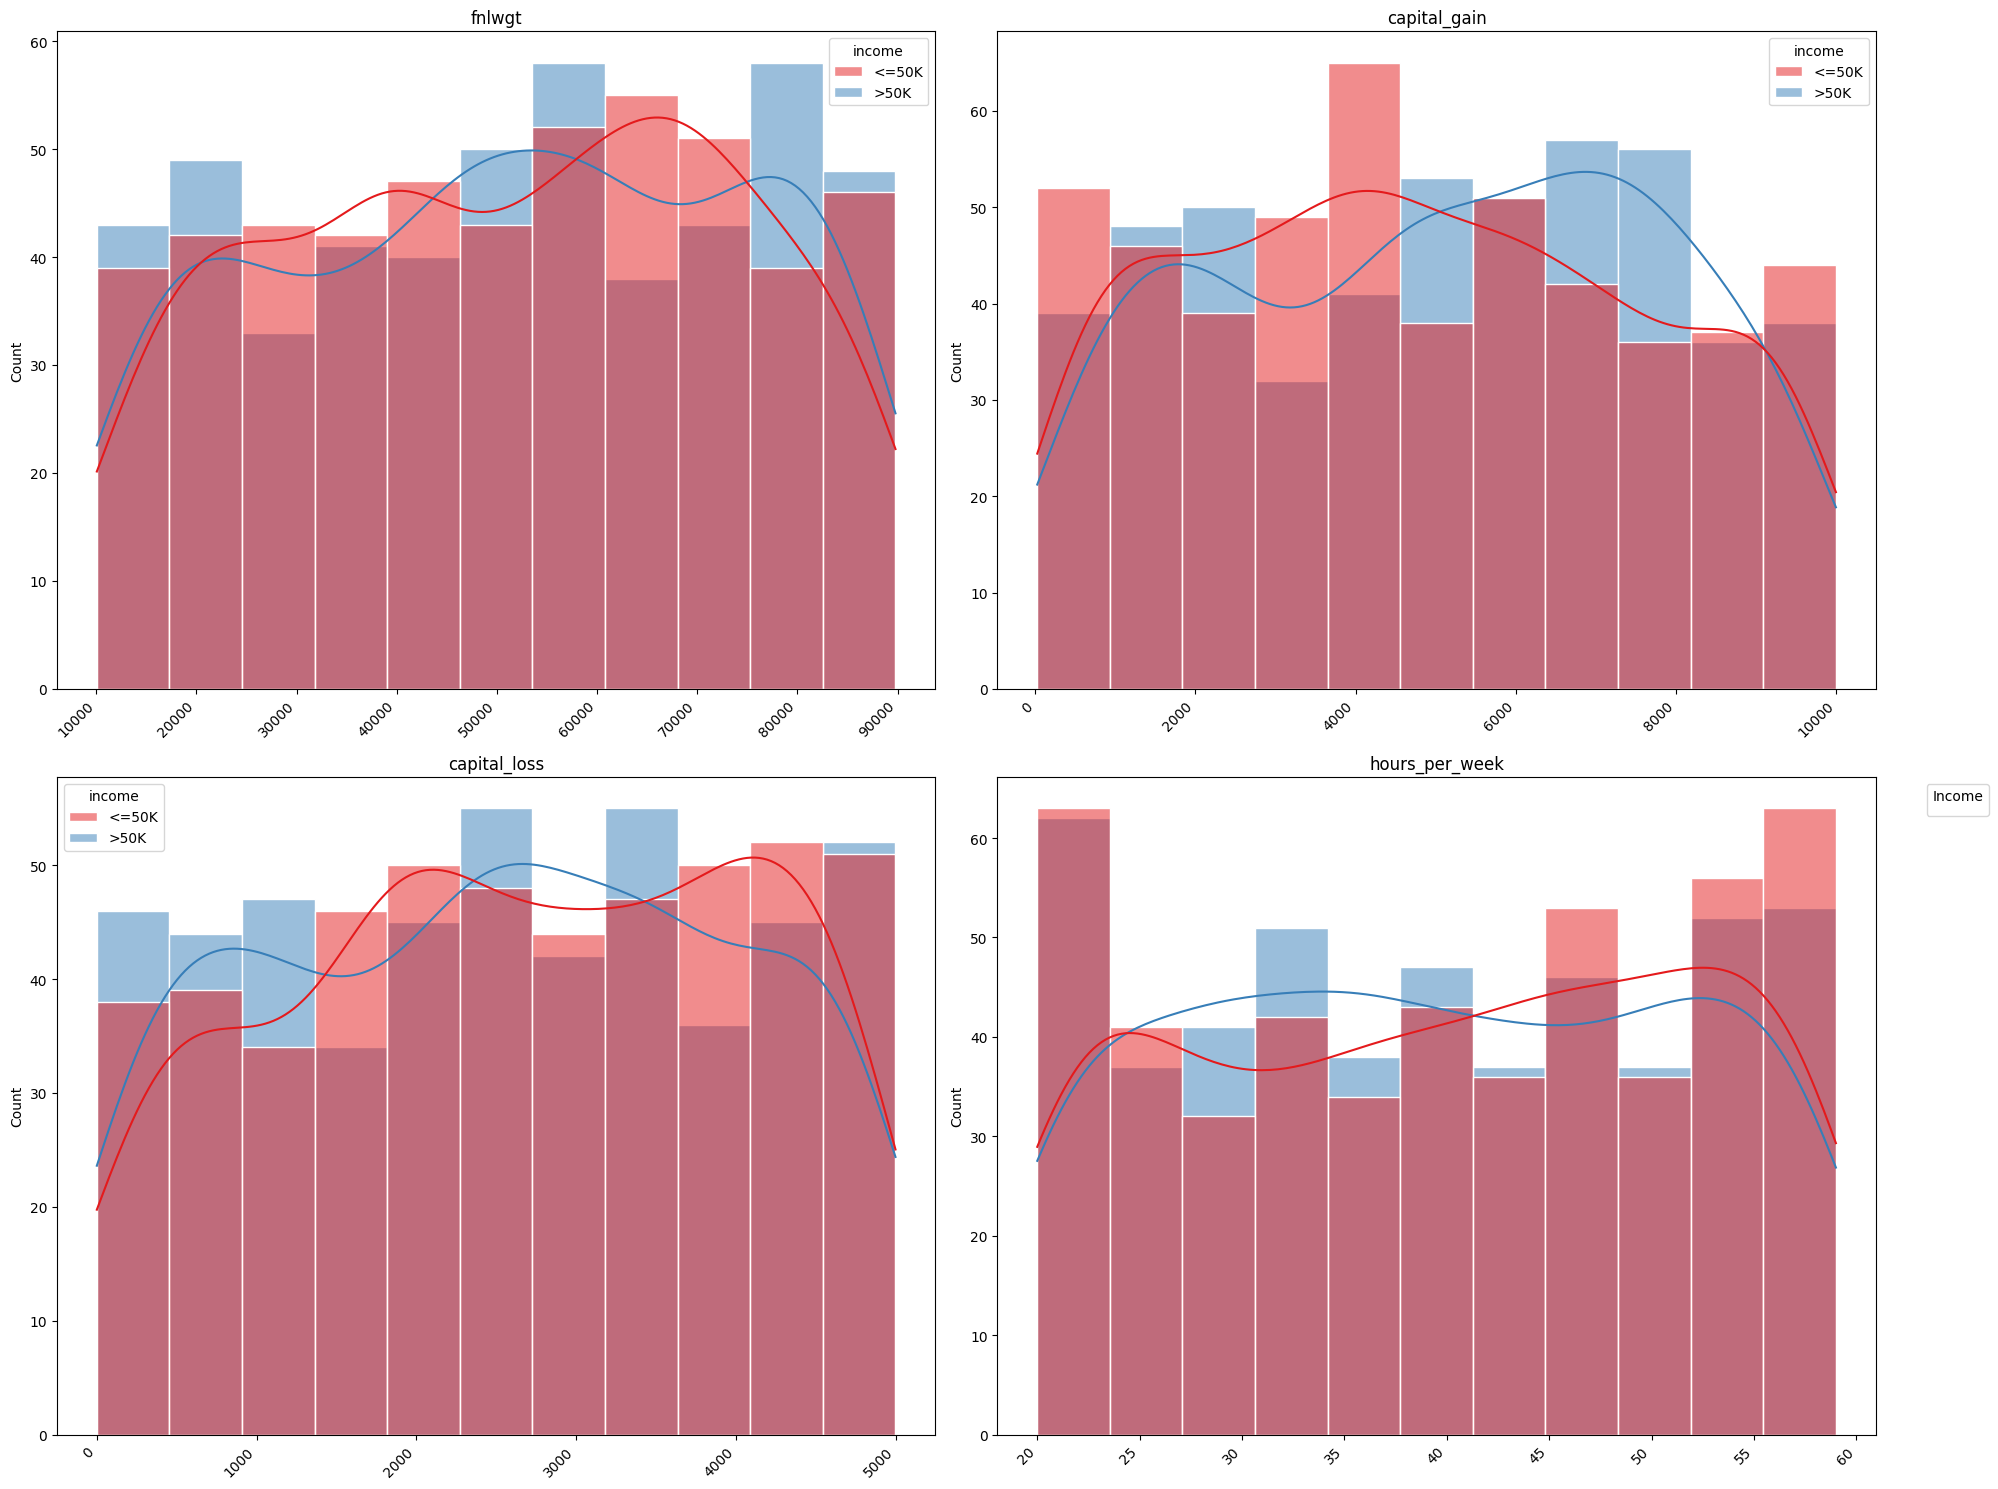

In [115]:
df = pd.DataFrame({
    'fnlwgt': np.random.randint(10000, 90000, 1000),
    'capital_gain': np.random.randint(0, 10000, 1000),
    'capital_loss': np.random.randint(0, 5000, 1000),
    'hours_per_week': np.random.randint(20, 60, 1000),
    'income': np.random.choice(['<=50K', '>50K'], size=1000),
})

# Create subplots grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Iterate over parameters and plot countplot
parameters = ['fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, parameter in enumerate(parameters):
    ax = axs[i // 2, i % 2]  # Corrected indexing here
    sns.histplot(x=parameter, hue='income', data=df, palette='Set1',kde = True, edgecolor='white', ax=ax)
    ax.set_title(parameter)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Rotate x-axis tick labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a common legend outside the subplots
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


- Fnlwgt (Final Weight):The distribution of fnlwgt appears to be relatively uniform. There is no clear separation between income levels based on this feature.
- Capital Gain:The majority of individuals have low capital gains. Some individuals have higher capital gains, but the distribution is skewed. High-income earners tend to have more significant capital gains.
- Capital Loss: Most individuals have low capital losses (near zero). The distribution is skewed, with a few instances of higher capital losses.
- Capital loss does not strongly correlate with income levels.
- Hours per Week:The distribution of work hours (hours_per_week) to be relatively skewed,shows peaks around 40 hours. 

In [116]:
df = pd.read_csv('adult.csv')
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


### Checking for Skewness

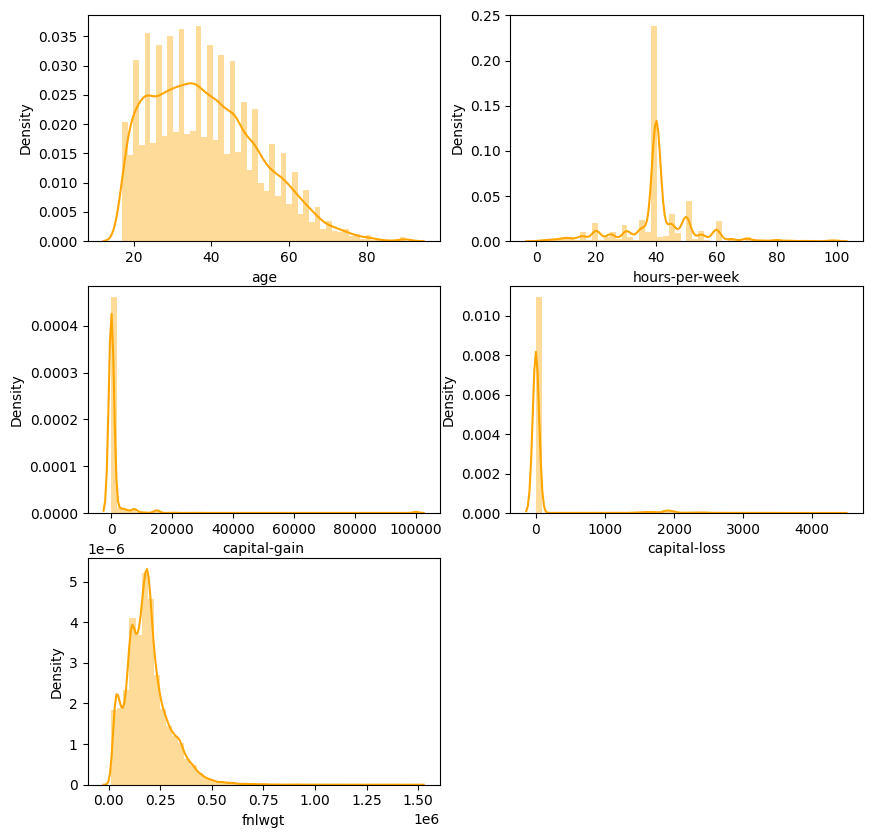

In [117]:
numerical_cols = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.distplot(x=df[col], color='orange') 
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.show()

- Data is skewed ie 'age', 'capital-gain', 'capital-loss'
- This indicates that most observations are concentrated at lower values, with a few instances of higher values, suggesting potential outliers or a positively skewed distribution in these features. 

In [118]:
skewness = df[['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']].skew()

In [119]:
skewness 

age                0.557580
hours-per-week     0.238750
capital-gain      11.894659
capital-loss       4.569809
fnlwgt             1.438892
dtype: float64

In [120]:
from sklearn.preprocessing import PowerTransformer
columns_to_transform = ['fnlwgt', 'capital-gain', 'capital-loss',]

power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
df[columns_to_transform] = power_transformer.fit_transform(df[columns_to_transform])
skewness_after = df[columns_to_transform].skew()
skewness_summary = pd.DataFrame({'Skewness After': skewness_after})
skewness_summary


,Skewness After
fnlwgt,0.015921
capital-gain,3.032359
capital-loss,4.295731


In [121]:
# removing skewness using square root method
df['capital-loss'] = np.sqrt(df['capital-loss'])
df['capital-gain'] = np.sqrt(df['capital-gain'])

In [122]:
sk= df[['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']].skew()
sk

age                0.557580
hours-per-week     0.238750
capital-gain     -19.190463
capital-loss       0.000000
fnlwgt             0.015921
dtype: float64

- The PowerTransformer and square root method successfully reduced positive skewness in key features 

### Rechecking for normal distribution

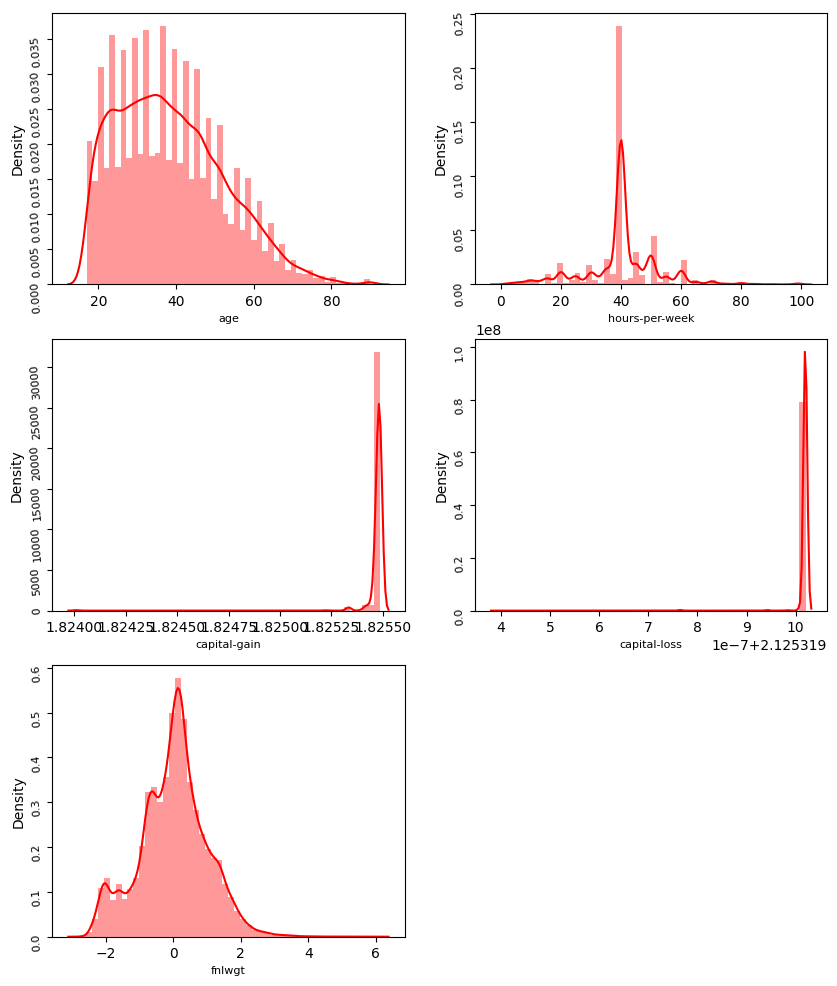

In [123]:
numerical_cols = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(10,12), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.distplot(x=df[col], color='r') 
        plt.xlabel(col, fontsize=8)
        plt.yticks(rotation=95, fontsize=8)
    plotnumber += 1

plt.show()

- still data is skewed lets right to check out using outliers correction

### Checking for outliers

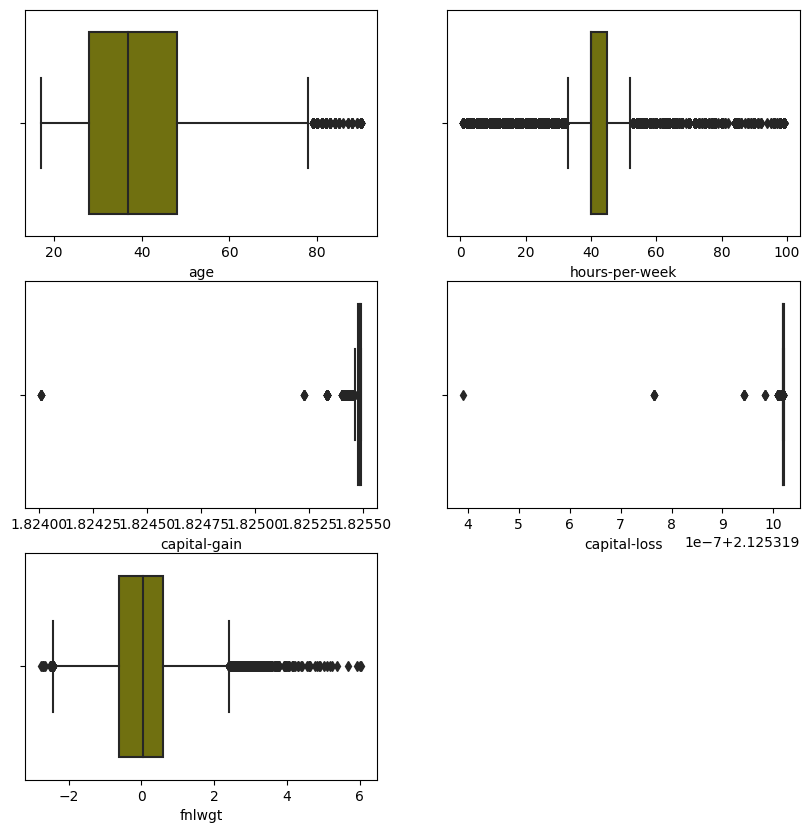

In [124]:
numerical_cols = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.boxplot(x=df[col], color='olive') 
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.show()

- We need to handle these outliers that may enhance the robustness of the analysis.

### Removing Outliers using zscore method

In [125]:
from scipy.stats import zscore

numeric_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
z_scores = zscore(df[numeric_columns])
outlier_mask = (z_scores > 4).any(axis=1)

df_no_outliers = df[~outlier_mask]
df_no_outliers.reset_index(drop=True, inplace=True)


- I used zscore to remove outliers where threshold value is greater than 4

In [126]:
df = df_no_outliers

In [127]:
df.shape

(48596, 15)

### Recheck for distribution after removing outliers

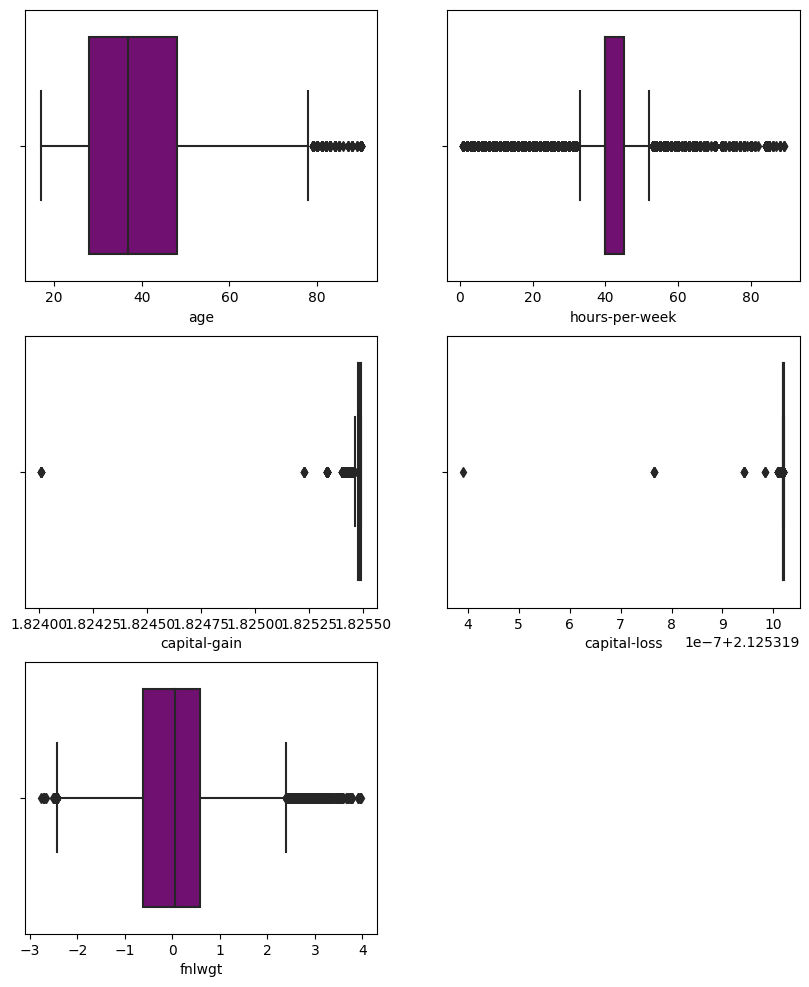

In [128]:
numerical_cols = ['age','hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

plt.figure(figsize=(10, 12), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.boxplot(x=df[col], color='purple') 
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=95, fontsize=10)
    plotnumber += 1

plt.show()

- We plotted box plot to recheck the presence of outliers after its removal

### Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

encoded_df, encoders = encode_categorical_columns(df, ['workclass','education','income','marital-status',
                                                       'occupation','relationship','race','gender','native-country'
                                                      ])

- LabelEncoder to transform the categorical data into binary form

In [130]:
df =encoded_df

In [131]:
df.dtypes

age                  int64
workclass            int32
fnlwgt             float64
education            int32
educational-num      int64
marital-status       int32
occupation           int32
relationship         int32
race                 int32
gender               int32
capital-gain       float64
capital-loss       float64
hours-per-week       int64
native-country       int32
income               int32
dtype: object

In [132]:
df.shape

(48596, 15)

In [133]:
df.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,4007.000000,2.271000e+03,48596.000000,48596.000000,48596.000000
mean,38.628694,3.868261,-0.002440,10.289098,10.077887,2.620401,6.573545,1.445263,3.668183,0.667894,1.825474,2.125320e+00,40.176167,36.746749,0.239053
std,13.714725,1.462883,0.992184,3.873633,2.568883,1.508330,4.230381,1.602212,0.846027,0.470973,0.000069,1.821911e-08,11.842427,7.778940,0.426509
min,17.000000,0.000000,-2.768747,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.824010,2.125319e+00,1.000000,0.000000,0.000000
25%,28.000000,4.000000,-0.615553,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,1.825475,2.125320e+00,40.000000,39.000000,0.000000
50%,37.000000,4.000000,0.052211,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,1.825484,2.125320e+00,40.000000,39.000000,0.000000
75%,48.000000,4.000000,0.586232,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,1.825487,2.125320e+00,45.000000,39.000000,0.000000
max,90.000000,8.000000,3.968818,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.825489,2.125320e+00,89.000000,41.000000,1.000000


- Count: There are 48596 data points in your dataset.

**Lets consider age:**
- The mean age is approximately 38.6
- The mean education level is around 10.28
- The mean capital gain is approximately 1.825
- standard deviation of age is approximately 13.7, indicating that ages tend to be close to the mean
- The minimum and maximum age are approximately 3.64 and 6.53, respectively
- The minimum education level is 0, and the maximum is 15
- 25th percentile of age is 28, suggesting that 25% of the data falls below this value
- The median (50th percentile) age is 37
- The 75th percentile of age is 48

**Other Observations**

*The minimum capital gain is 0, and the maximum is 1.825489 and the majority of the 'income' values seem to be 1, as indicated by the mean of 0.23 and the 75th percentile being 0.

### Checking for Multicollinearity

- The correlation matrix provides insights into the relationships between different features.

In [134]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.017186,-0.070123,-0.015082,0.031683,-0.264556,-0.014391,-0.263968,0.028269,0.088476,0.079433,0.021374,0.068629,-0.003093,0.231411
workclass,0.017186,1.000000,-0.015753,0.016642,0.055945,-0.068624,0.260410,-0.092436,0.052719,0.091033,0.026062,0.008980,0.141599,-0.008447,0.052718
fnlwgt,-0.070123,-0.015753,1.000000,-0.023854,-0.037273,0.030157,0.002334,0.009270,-0.015499,0.025743,-0.001416,0.011474,-0.013925,-0.055674,-0.001345
education,-0.015082,0.016642,-0.023854,1.000000,0.359118,-0.037017,-0.021438,-0.010850,0.013630,-0.027142,0.060333,0.038252,0.061483,0.061252,0.080046
educational-num,0.031683,0.055945,-0.037273,0.359118,1.000000,-0.070556,0.111845,-0.091081,0.029465,0.009525,0.128473,0.019477,0.150490,0.049574,0.333436
marital-status,-0.264556,-0.068624,0.030157,-0.037017,-0.070556,1.000000,-0.017395,0.188046,-0.070213,-0.127700,-0.104262,0.041423,-0.189695,-0.020742,-0.199290
occupation,-0.014391,0.260410,0.002334,-0.021438,0.111845,-0.017395,1.000000,-0.075899,0.005838,0.074751,0.047603,0.007948,0.079435,-0.013010,0.076553
relationship,-0.263968,-0.092436,0.009270,-0.010850,-0.091081,0.188046,-0.075899,1.000000,-0.117140,-0.579412,-0.135144,-0.085646,-0.255921,-0.003968,-0.253604
race,0.028269,0.052719,-0.015499,0.013630,0.029465,-0.070213,0.005838,-0.117140,1.000000,0.086598,0.046557,0.022723,0.040472,0.138845,0.070814
gender,0.088476,0.091033,0.025743,-0.027142,0.009525,-0.127700,0.074751,-0.579412,0.086598,1.000000,0.103450,0.100529,0.233555,-0.010353,0.214831


- NaN values are found in df.corr() for 'capital-gain'and 'capital-loss'

In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
features_for_imputation = ['capital-gain', 'capital-loss']

df[features_for_imputation] = imputer.fit_transform(df[features_for_imputation])


In [136]:
nan_check = df[['capital-gain', 'capital-loss']].isna().sum()

print(nan_check)

capital-gain    0
capital-loss    0
dtype: int64


In [137]:
# Assuming you have already imputed missing values
# Impute missing values in 'capital-gain' and 'capital-loss' with the mean
df['capital-gain'].fillna(df['capital-gain'].mean(), inplace=True)
df['capital-loss'].fillna(df['capital-loss'].mean(), inplace=True)

# Replace the original columns with imputed values
df['capital-gain'] = df['capital-gain'].fillna(df['capital-gain'].mean())
df['capital-loss'] = df['capital-loss'].fillna(df['capital-loss'].mean())


- NaN is replaced by mean for 'capital-gain', 'capital-loss'

In [138]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.017186,-0.070123,-0.015082,0.031683,-0.264556,-0.014391,-0.263968,0.028269,0.088476,2.225839e-02,4.338778e-03,0.068629,-0.003093,0.231411
workclass,0.017186,1.000000,-0.015753,0.016642,0.055945,-0.068624,0.260410,-0.092436,0.052719,0.091033,7.439342e-03,1.945392e-03,0.141599,-0.008447,0.052718
fnlwgt,-0.070123,-0.015753,1.000000,-0.023854,-0.037273,0.030157,0.002334,0.009270,-0.015499,0.025743,-3.990377e-04,2.399919e-03,-0.013925,-0.055674,-0.001345
education,-0.015082,0.016642,-0.023854,1.000000,0.359118,-0.037017,-0.021438,-0.010850,0.013630,-0.027142,1.445162e-02,7.160431e-03,0.061483,0.061252,0.080046
educational-num,0.031683,0.055945,-0.037273,0.359118,1.000000,-0.070556,0.111845,-0.091081,0.029465,0.009525,3.842622e-02,4.326447e-03,0.150490,0.049574,0.333436
marital-status,-0.264556,-0.068624,0.030157,-0.037017,-0.070556,1.000000,-0.017395,0.188046,-0.070213,-0.127700,-2.575290e-02,7.900185e-03,-0.189695,-0.020742,-0.199290
occupation,-0.014391,0.260410,0.002334,-0.021438,0.111845,-0.017395,1.000000,-0.075899,0.005838,0.074751,1.338202e-02,1.708193e-03,0.079435,-0.013010,0.076553
relationship,-0.263968,-0.092436,0.009270,-0.010850,-0.091081,0.188046,-0.075899,1.000000,-0.117140,-0.579412,-3.882588e-02,-1.811198e-02,-0.255921,-0.003968,-0.253604
race,0.028269,0.052719,-0.015499,0.013630,0.029465,-0.070213,0.005838,-0.117140,1.000000,0.086598,1.240458e-02,4.469942e-03,0.040472,0.138845,0.070814
gender,0.088476,0.091033,0.025743,-0.027142,0.009525,-0.127700,0.074751,-0.579412,0.086598,1.000000,2.666753e-02,1.981675e-02,0.233555,-0.010353,0.214831


- Positive Correlations: Higher educational attainment and longer weekly working hours ("hours-per-week") are positively correlated with income, suggesting that individuals with more education and longer work hours tend to have higher incomes.
- Neutral to Weak Positive Correlations: Age and gender also show positive correlations, though relatively weaker. Older individuals and males tend to have slightly higher incomes.
- Negative Correlations: Marital status ("marital-status") and relationship status ("relationship") exhibit negative correlations, indicating that those who are single or have fewer family responsibilities may have higher incomes.

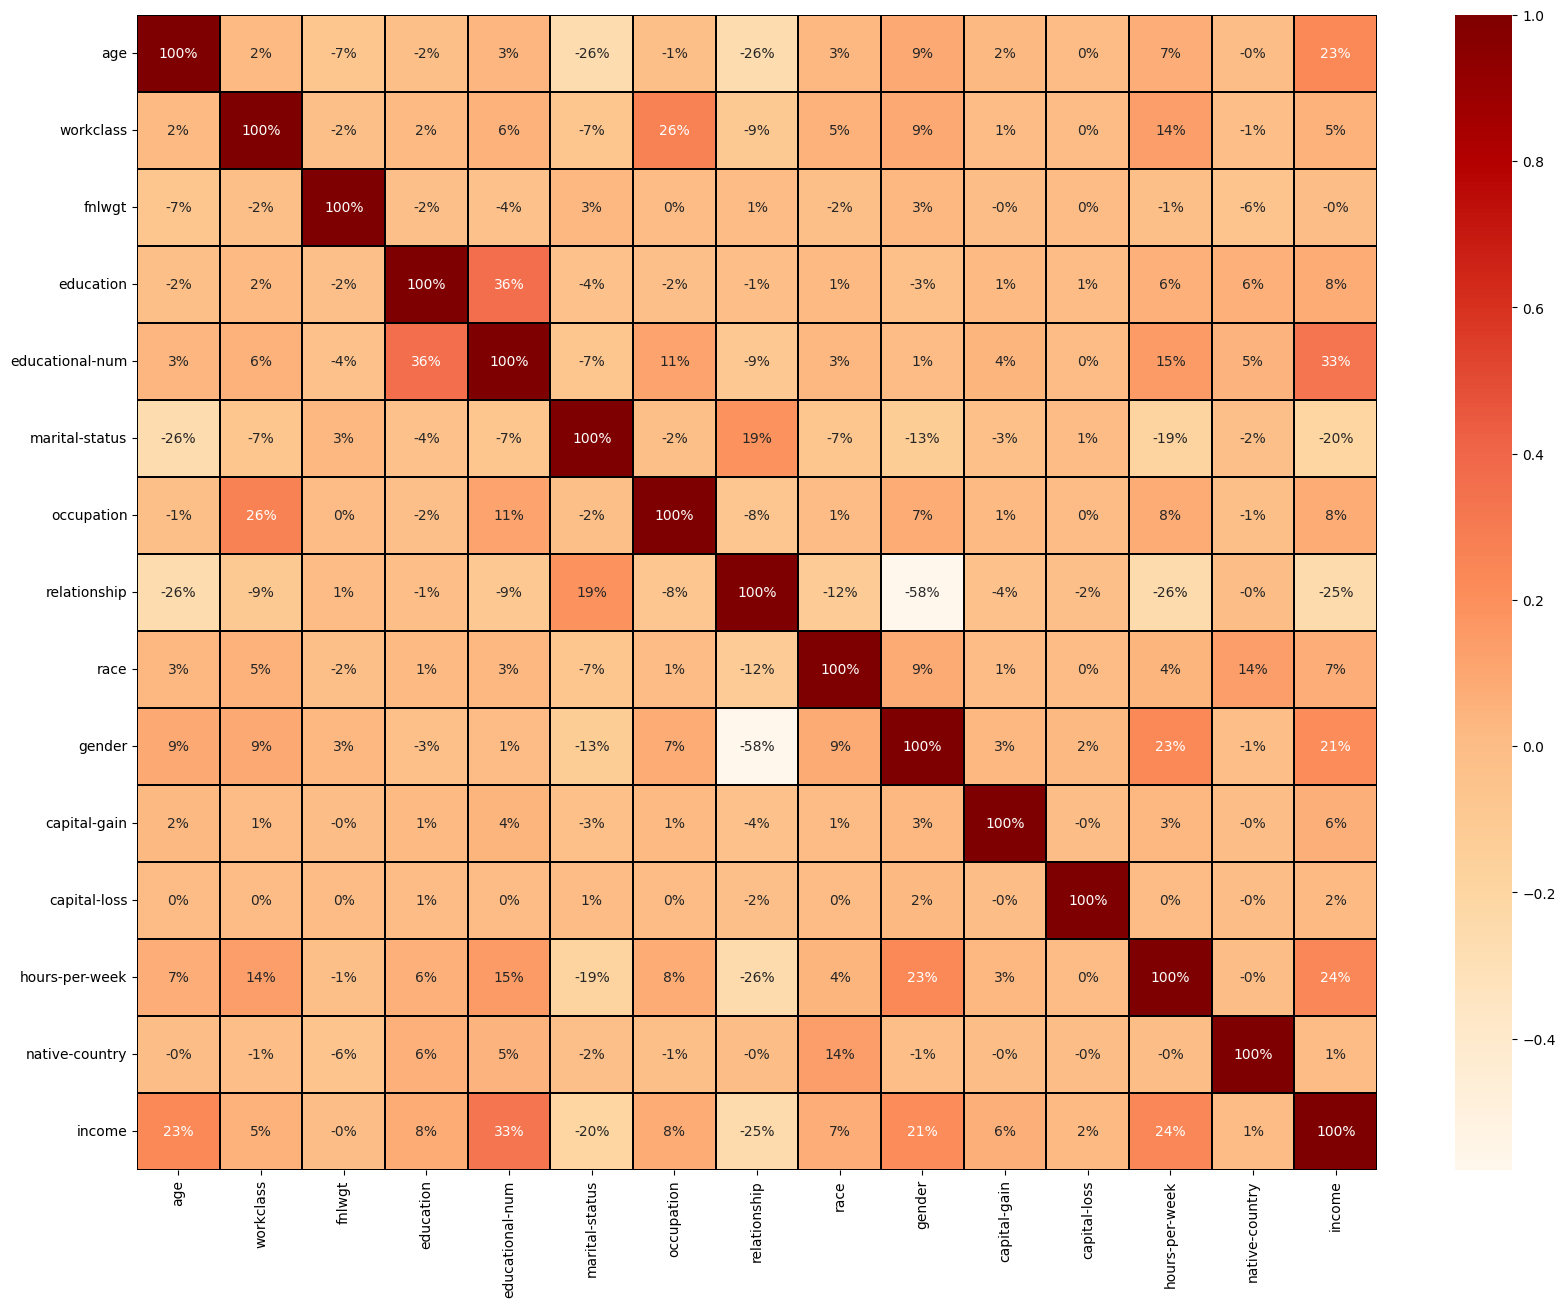

In [139]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'OrRd')
plt.yticks(rotation=0)
plt.show()

In [140]:
df.corr()['income'].sort_values(ascending = False)

income             1.000000
educational-num    0.333436
hours-per-week     0.236230
age                0.231411
gender             0.214831
education          0.080046
occupation         0.076553
race               0.070814
capital-gain       0.064522
workclass          0.052718
capital-loss       0.017398
native-country     0.011921
fnlwgt            -0.001345
marital-status    -0.199290
relationship      -0.253604
Name: income, dtype: float64

- The correlation matrix indicates that higher educational attainment ("educational-num") and longer weekly working hours ("hours-per-week") are positively correlated with income. 
- Age and gender also show weaker positive correlations with income. Conversely, being single or having fewer family responsibilities, as indicated by marital and relationship status, exhibits negative correlations with income.
- Other features such as race, occupation, and capital-related variables show varying degrees of correlation with income. It's important to consider these relationships cautiously, as correlation does not imply causation, and additional context may be needed for a more nuanced interpretation.

### Correlation between label and features

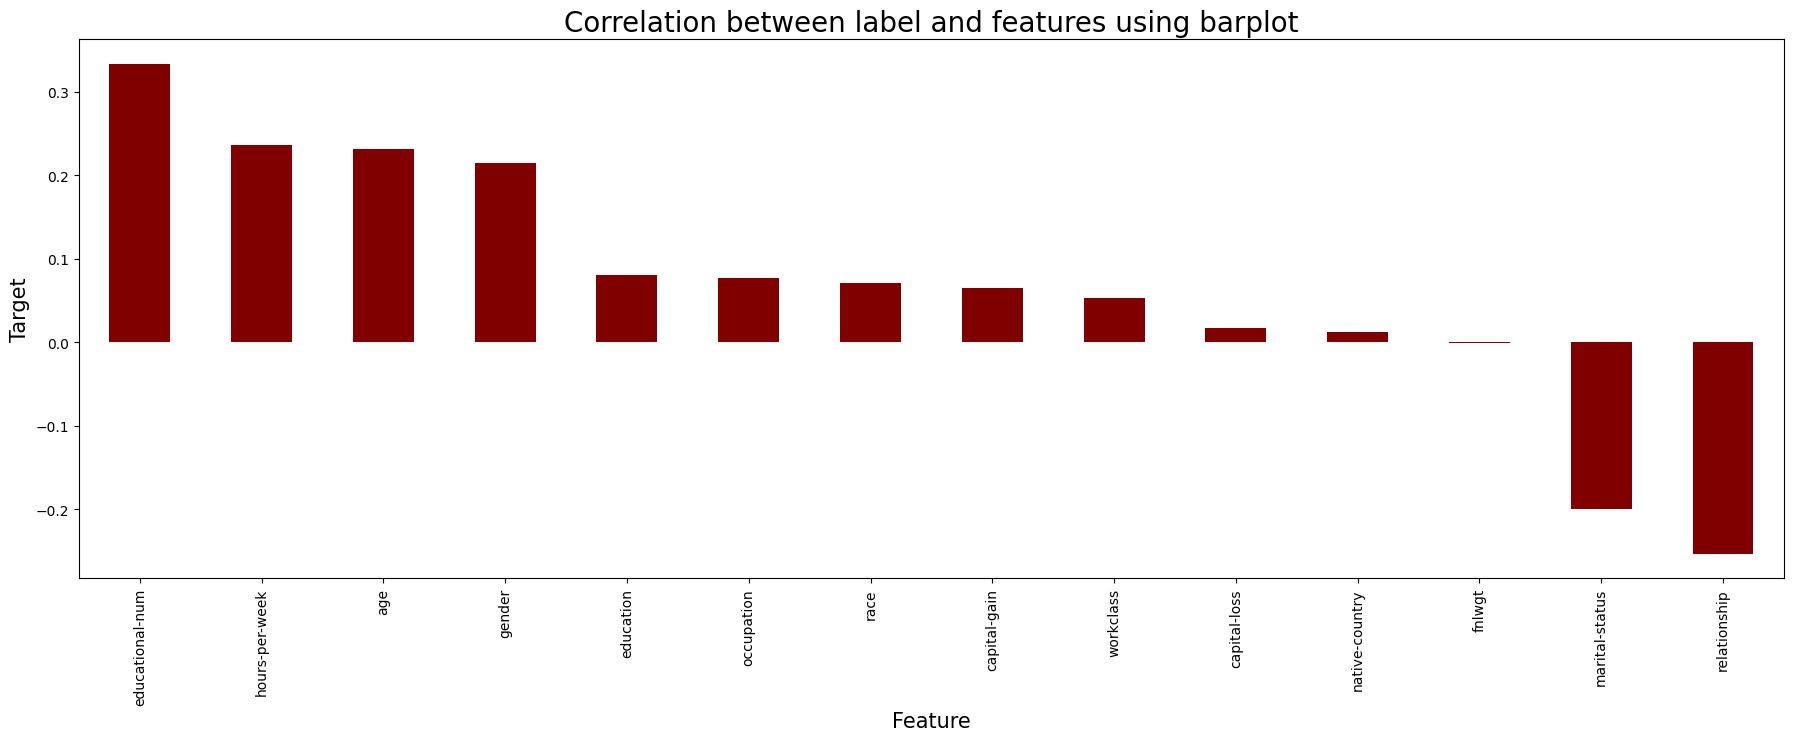

In [141]:
plt.figure(figsize = (22,7))
df.corr()['income'].sort_values(ascending = False).drop(['income']).plot(kind='bar',color='maroon')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- The analysis indicates that education.num, age, and hours worked per week,sex are more strongly correlated with higher income.
- These features are the predictors in a classification model for income prediction.

### Separating independent variables from target variable

In [142]:
x=df.drop(columns=['income'],axis=1)
y=df['income']

### Standardization

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.993737,0.090055,0.503450,-2.398057,-1.198154,0.914663,0.100809,0.970379,-1.971804,0.705154,-2.237002e-11,1.127795e-07,-0.014876,0.289663
1,-0.045841,0.090055,-0.995970,0.183525,-0.419598,-0.411321,-0.371967,-0.902052,0.392211,0.705154,-2.237002e-11,1.127795e-07,0.829554,0.289663
2,-0.774992,-1.277122,1.343474,-0.849108,0.748237,-0.411321,1.046360,-0.902052,0.392211,0.705154,-2.237002e-11,1.127795e-07,-0.014876,0.289663
3,0.391649,0.090055,-0.126816,1.216158,-0.030320,-0.411321,0.100809,-0.902052,-1.971804,0.705154,5.269485e-01,1.127795e-07,-0.014876,0.289663
4,-1.504143,-2.644299,-0.802277,1.216158,-0.030320,0.914663,-1.553906,0.970379,0.392211,-1.418129,-2.237002e-11,1.127795e-07,-0.859306,0.289663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48591,-0.847907,0.090055,0.756285,-0.849108,0.748237,-0.411321,1.519135,2.218666,0.392211,-1.418129,-2.237002e-11,1.127795e-07,-0.183762,0.289663
48592,0.099989,0.090055,-0.190165,0.183525,-0.419598,-0.411321,0.100809,-0.902052,0.392211,0.705154,-2.237002e-11,1.127795e-07,-0.014876,0.289663
48593,1.412460,0.090055,-0.216820,0.183525,-0.419598,2.240646,-1.317518,1.594523,0.392211,-1.418129,-2.237002e-11,1.127795e-07,-0.014876,0.289663
48594,-1.212483,0.090055,0.278113,0.183525,-0.419598,0.914663,-1.317518,0.970379,0.392211,0.705154,-2.237002e-11,1.127795e-07,-1.703736,0.289663


In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

,vif values,Features
0,1.150566,age
1,1.097116,workclass
2,1.010863,fnlwgt
3,1.158653,education
4,1.198760,educational-num
5,1.126631,marital-status
6,1.094283,occupation
7,1.678115,relationship
8,1.039154,race
9,1.549076,gender


- Most of the features have VIF values close to 1, indicating low multicollinearity. 
- This is favorable for the classification model, as it suggests that these features are not highly correlated with each other.

### Target variable is imbalanced

In [145]:
y.value_counts()

income
0    36979
1    11617
Name: count, dtype: int64

- The dataset seems to be imbalanced, as the count for 'income' category 0 is significantly larger than category 1.

### Balancing the Dataset Through Oversampling

In [146]:
# Oversampling the data
import imblearn
from imblearn.over_sampling import SMOTE  
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [147]:
y.value_counts()

income
0    36979
1    36979
Name: count, dtype: int64

- Data seems to be balanced after SMOTE method

### Modelling

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [149]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9067063277447269 at random_state 4


In [150]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [151]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [152]:
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9020641788354066
[[ 9959  1225]
 [  948 10056]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11184
           1       0.89      0.91      0.90     11004

    accuracy                           0.90     22188
   macro avg       0.90      0.90      0.90     22188
weighted avg       0.90      0.90      0.90     22188



### LogisticRegression

In [153]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7786190733729944
[[8646 2538]
 [2374 8630]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     11184
           1       0.77      0.78      0.78     11004

    accuracy                           0.78     22188
   macro avg       0.78      0.78      0.78     22188
weighted avg       0.78      0.78      0.78     22188



### KNeighborsClassifier

In [154]:
knn = KNeighborsClassifier()                    
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8532990805840995
[[ 8761  2423]
 [  832 10172]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     11184
           1       0.81      0.92      0.86     11004

    accuracy                           0.85     22188
   macro avg       0.86      0.85      0.85     22188
weighted avg       0.86      0.85      0.85     22188



### GradientBoostingClassifier

In [155]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8684874707048855
[[9359 1825]
 [1093 9911]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     11184
           1       0.84      0.90      0.87     11004

    accuracy                           0.87     22188
   macro avg       0.87      0.87      0.87     22188
weighted avg       0.87      0.87      0.87     22188



### AdaBoostClassifier

In [156]:
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.8579412294934199
[[9354 1830]
 [1322 9682]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11184
           1       0.84      0.88      0.86     11004

    accuracy                           0.86     22188
   macro avg       0.86      0.86      0.86     22188
weighted avg       0.86      0.86      0.86     22188



### BaggingClassifier

In [157]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8886785649900847
[[10014  1170]
 [ 1300  9704]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     11184
           1       0.89      0.88      0.89     11004

    accuracy                           0.89     22188
   macro avg       0.89      0.89      0.89     22188
weighted avg       0.89      0.89      0.89     22188



### Support Vector Classifier

In [158]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8404993690283036
[[8708 2476]
 [1063 9941]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     11184
           1       0.80      0.90      0.85     11004

    accuracy                           0.84     22188
   macro avg       0.85      0.84      0.84     22188
weighted avg       0.85      0.84      0.84     22188



### ExtraTreesClassifier

In [159]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9059401478276546
[[ 9952  1232]
 [  855 10149]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11184
           1       0.89      0.92      0.91     11004

    accuracy                           0.91     22188
   macro avg       0.91      0.91      0.91     22188
weighted avg       0.91      0.91      0.91     22188



### Cross Validation Score

In [160]:
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [161]:
score1 = cross_val_score(RFC,x,y)
print(score1)
print('RFC score:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.83328826 0.87648729 0.92969173 0.93016023 0.93036306]
RFC score: 0.8999981141602378
Difference between Accuracy score and cross validation is:  0.0020660646751687883


### LogisticRegression

In [162]:
score2 = cross_val_score(LR,x,y)
print(score2)
print('LR score:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.76379124 0.77372904 0.77494592 0.77810831 0.7772294 ]
LR score: 0.7735607806612407
Difference between Accuracy score and cross validation is:  0.005058292711753731


### KNeighborsClassifier

In [163]:
score3 = cross_val_score(knn,x,y)
print(score3)
print('knn score:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predknn)-score3.mean())

[0.83856138 0.84849919 0.8650622  0.86728416 0.87012372]
knn score: 0.8579061304473117
Difference between Accuracy score and cross validation is:  -0.004607049863212143


### GradientBoostClassifier

In [164]:
score4 = cross_val_score(GB,x,y)
print(score4)
print('GB score:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.819159   0.8520146  0.87878583 0.88141437 0.87661416]
GB score: 0.861597593679433
Difference between Accuracy score and cross validation is:  0.006889877025452518


### AdaBoostClassifier

In [165]:
score5 = cross_val_score(ABC,x,y)
print(score5)
print('ABC score:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.81510276 0.8421444  0.86445376 0.86856872 0.86532351]
ABC score: 0.8511186302356919
Difference between Accuracy score and cross validation is:  0.00682259925772799


### BaggingClassifier

In [166]:
score6 = cross_val_score(BC,x,y)
print(score6)
print('BC score:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.79637642 0.86168199 0.91833423 0.92164154 0.92218241]
BC score: 0.8840433183335179
Difference between Accuracy score and cross validation is:  0.004635246656566783


### Support Vector Classifier

In [167]:
score7 = cross_val_score(svc,x,y)
print(score7)
print('svc score:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.82929962 0.82808275 0.83464035 0.83868569 0.83740112]
svc score: 0.8336219049054833
Difference between Accuracy score and cross validation is:  0.006877464122820309


### ExtraTreesClassifier

In [168]:
score8 = cross_val_score(ET,x,y)
print(score8)
print('ET score:',score8.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score8.mean())

[0.86316928 0.8881152  0.92915089 0.93110675 0.92874045]
ET score: 0.9080565149703134
Difference between Accuracy score and cross validation is:  -0.002116367142658726


### Compare accuracy of models

In [169]:
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Trees Classifier',score8.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['LogisticRegression',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

,Models,Accuracy
0,Support Vector Machine,83.362190
1,Extra Trees Classifier,90.805651
2,Gradient Boost Classifier,86.159759
3,LogisticRegression,77.356078
4,Random Forest Classifier,89.999811
5,KNeighborsClassifier,85.790613
6,AdaBoostClassifier,85.111863
7,Bagging Classifier,88.404332


**The model selected is RandomForestClassifier**

- Accuracy score : 90.0%
- cross_val_score: 89.99%
- Difference between Accuracy score and cross validation is: 0.022

### Hyperparameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
# RandomForestClassifier
params = {'n_estimators':[13,15,17,19,21],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6],
          'n_jobs': [-2,-1,1],
          'random_state':[10,50,1000]}

In [172]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15, 17, 19, 21],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [173]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 21, 'n_jobs': -2, 'random_state': 50}


In [174]:
Final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 90.27%


In [176]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9955  1229]
 [  929 10075]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11184
           1       0.89      0.92      0.90     11004

    accuracy                           0.90     22188
   macro avg       0.90      0.90      0.90     22188
weighted avg       0.90      0.90      0.90     22188



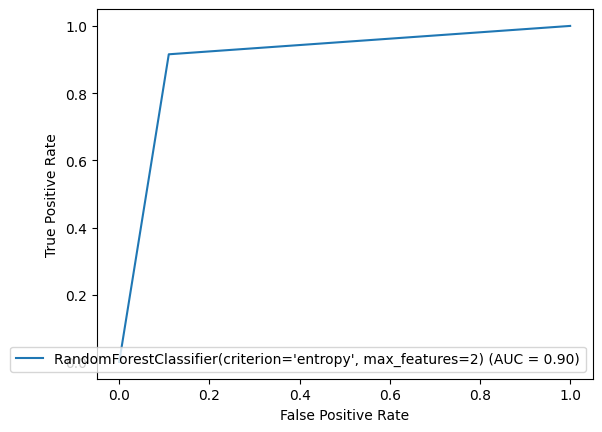

In [177]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

- Setting criterion to entropy, max_features to 2, and achieving an AUC of 0.90 suggests a strong model. 
- In this case, the true positive rate is relatively high, indicating good sensitivity, while the false positive rate is also present but controlled, reflecting a balance between performance and specificity.

In [178]:
import pickle
with open('Census_income_Prediction.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [179]:
with open('Census_income_Prediction.pkl', 'rb') as file:
    model = pickle.load(file)
    result = model.score(x_test,y_test)
    print(result*100)

90.27402199387056


In [180]:
rfc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =pred
df['Actual'] = rfc
df

,Predicted,Actual
0,0,0
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
22183,1,1
22184,1,1
22185,1,1
22186,0,0
